# Spaceship destination prediction.
- The purpose of the notebook is to practice Exploratory Data Analysis, Visualization using cyberpunk and QQ plot, and Machine Learning as well as show you how I have applied a systematic Data Science workflow.

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Breathtaking visuals
import mplcyberpunk
plt.style.use("cyberpunk")

# Create and set palette
#colors = ['#79DAE8', '#2155CD']
#sns.set_palette(sns.color_palette(colors))

# to display max column width
pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, svm
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ( AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier)
from catboost import CatBoostClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

c:\Users\chand\anaconda3\envs\mywork\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


To get teh ggplot style you need to install below.<br>
 **pip install mplcyberpunk**

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
# read train and test data.
train_df = pd.read_csv('titanic_spaceship_train.csv')
test_df = pd.read_csv('titanic_spaceship_test.csv')
test_df_copy = test_df.copy()
df = [train_df, test_df]

In [4]:
# check the number of rows and columns.
train_df.shape

(8693, 14)

In [5]:
# view the data.
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# assign numerical and categorical features to a varialbe
df_num = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
df_cat = train_df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']]

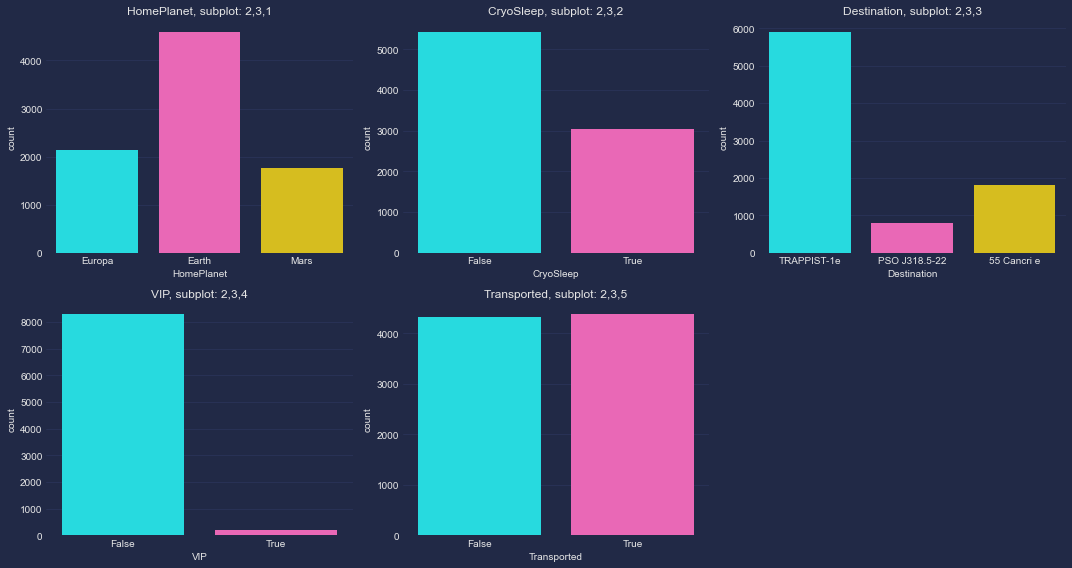

In [7]:
#  Categorical Data
cat_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,8))

for i in cat_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    ax = sns.countplot(x=train_df[i])
    c = c + 1

plt.tight_layout()
plt.show()

- Majority of the travellers are from Earth, followed by Europa.
- Most of the travellers did not opt for Crypto sleep.
- Majority of the travellers chose TRAPPIST-1e as a distination.
- Very small percent of travellers are VIP.
- Not much of disparity in whether travellers transported or not.

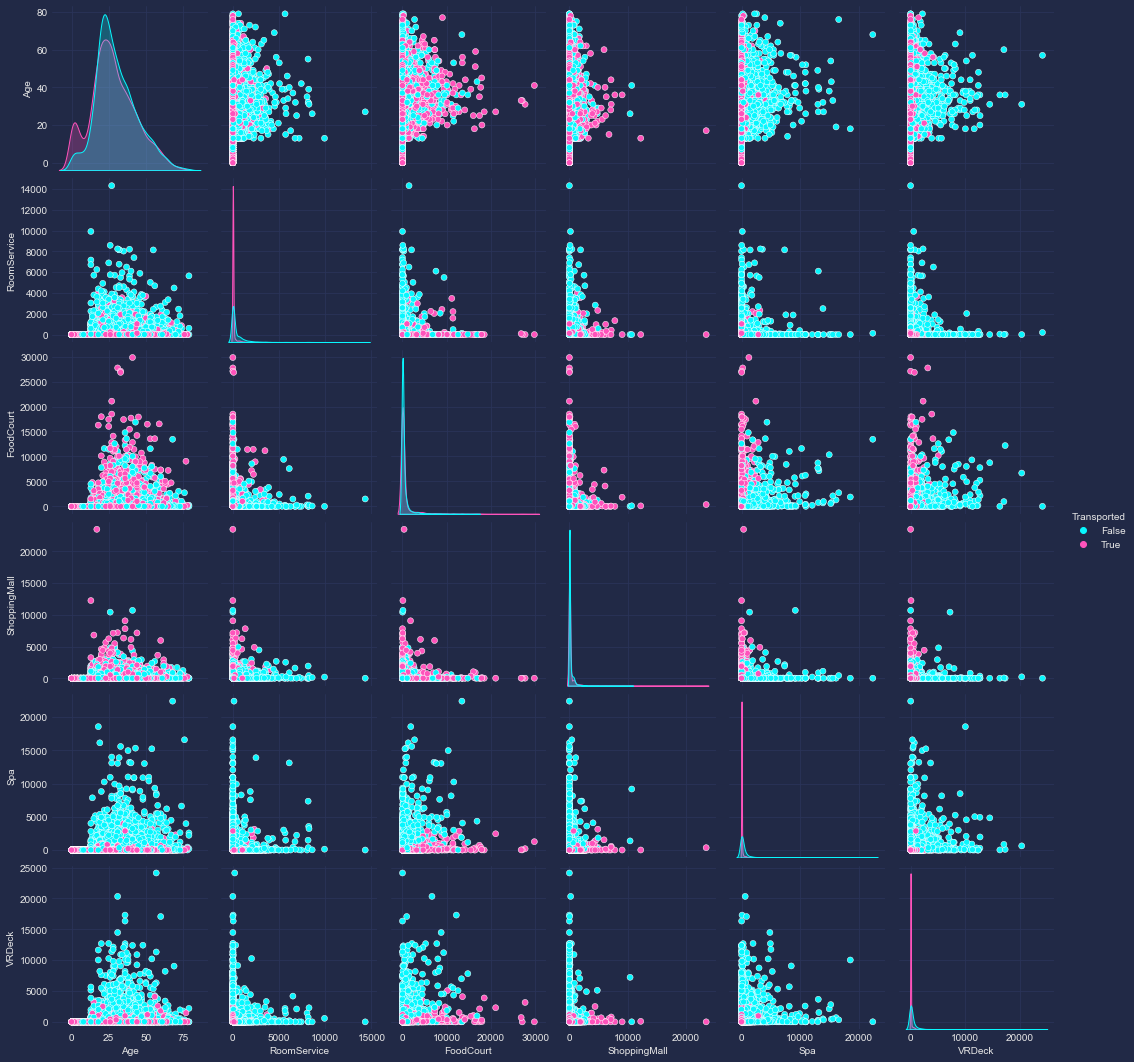

In [8]:
sns.pairplot(df_num, hue='Transported')
plt.show()

- Age looks normally distributed.
- Some features are skewed.
- We dont observe any linear patterns in the data.

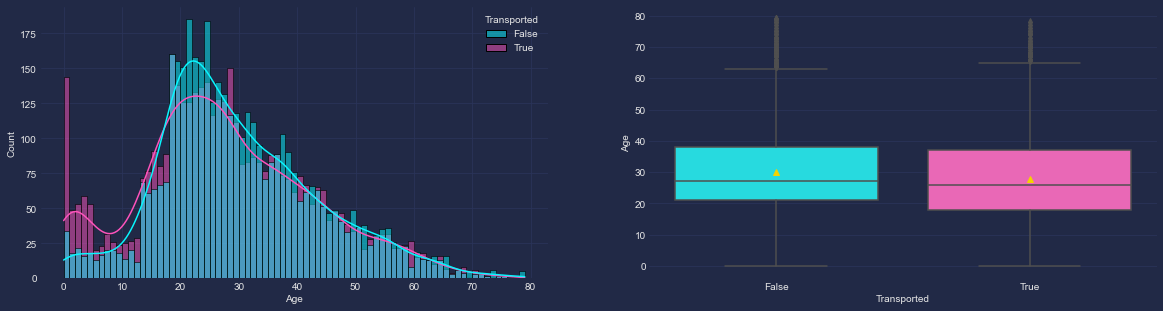

In [9]:
# histogram
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x="Age", hue="Transported", binwidth=1, kde=True);

# box plot
plt.subplot(1,2,2)
sns.boxplot(data=train_df, x="Transported", y="Age",showmeans=True);
plt.show()

**Observations**
- Passengers (<18) were more likely to be transported than other age groups, as we can see the Purple shade (Transported True) is greater than Blue Shade (Transported False).
- Passengers (21-28) were less likely to be transported. Higher Blue Shaded area than Purpule shades for the age between 21-28.
- Age seems to follow a normal distribution, but a little skewed to the right.

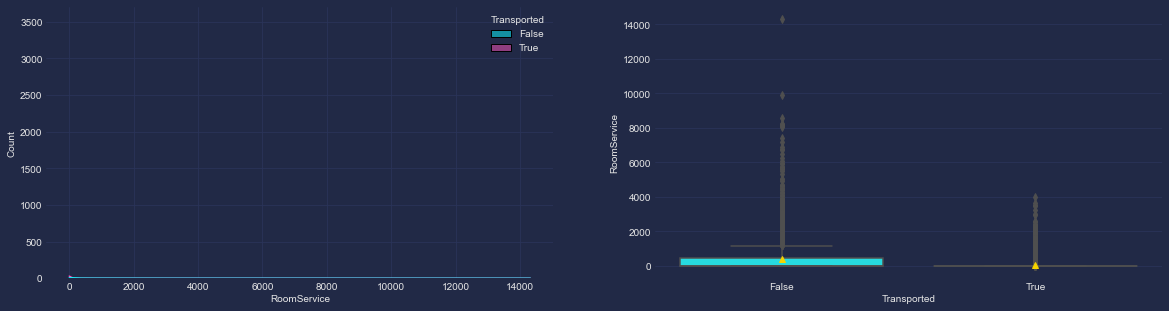

In [10]:
# histogram
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x="RoomService", hue="Transported", binwidth=1, kde=True);

# box plot
plt.subplot(1,2,2)
sns.boxplot(data=train_df, x="Transported", y="RoomService",showmeans=True);
plt.show()

In [11]:
train_df.groupby(['Transported'])['RoomService'].describe().T

Transported,False,True
count,4217.000000,4295.000000
mean,389.266066,63.098021
std,875.638123,274.812497
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,473.000000,0.000000
max,14327.000000,3992.000000


- We can observe the proportion of people transported and not transported for the Roomservice almost the same. Seems to be Room service does not have any impact if you pay  more for room service or not.

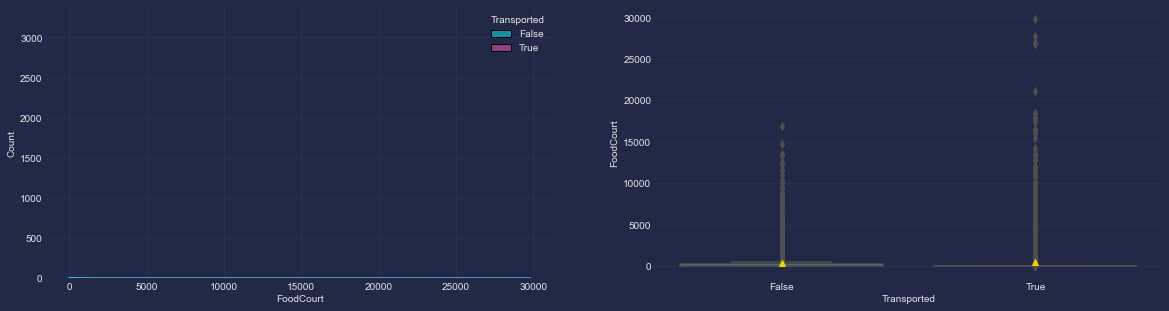

In [12]:
# histogram
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x="FoodCourt", hue="Transported", binwidth=1, kde=True);

# box plot
plt.subplot(1,2,2)
sns.boxplot(data=train_df, x="Transported", y="FoodCourt",showmeans=True);
plt.show()

In [13]:
train_df.groupby(['Transported'])['FoodCourt'].describe().T

Transported,False,True
count,4231.000000,4279.000000
mean,382.615930,532.691984
std,1200.115601,1931.306995
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,179.000000,0.000000
max,16856.000000,29813.000000


- Food court also follows the same pattern, proportion of people transported not not pretty much the same.This says that spending money on food court does not have greater impact in transport.

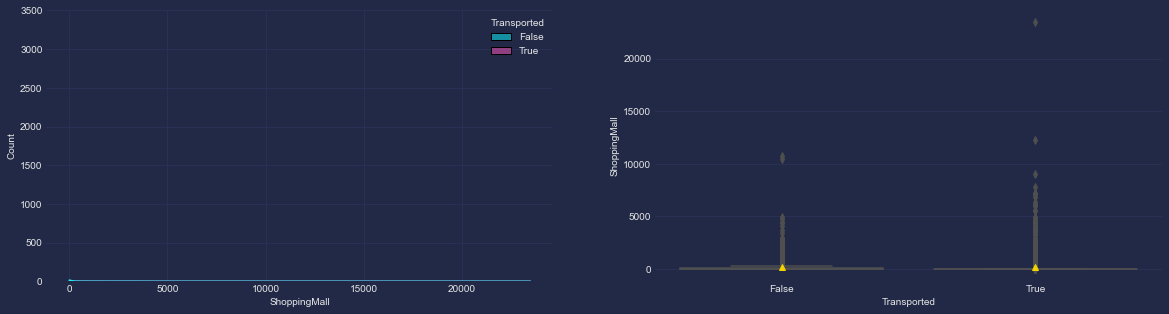

In [14]:
# histogram
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x="ShoppingMall", hue="Transported", binwidth=1, kde=True);

# box plot
plt.subplot(1,2,2)
sns.boxplot(data=train_df, x="Transported", y="ShoppingMall",showmeans=True);
plt.show()

In [15]:
train_df.groupby(['Transported'])['ShoppingMall'].describe().T

Transported,False,True
count,4221.000000,4264.000000
mean,167.566217,179.829972
std,456.528126,722.026714
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,95.000000,0.000000
max,10705.000000,23492.000000


- Proportion of people transported and not almost the same, this indicates that spending more on Shopping mall does not have any impact in Transported or not.

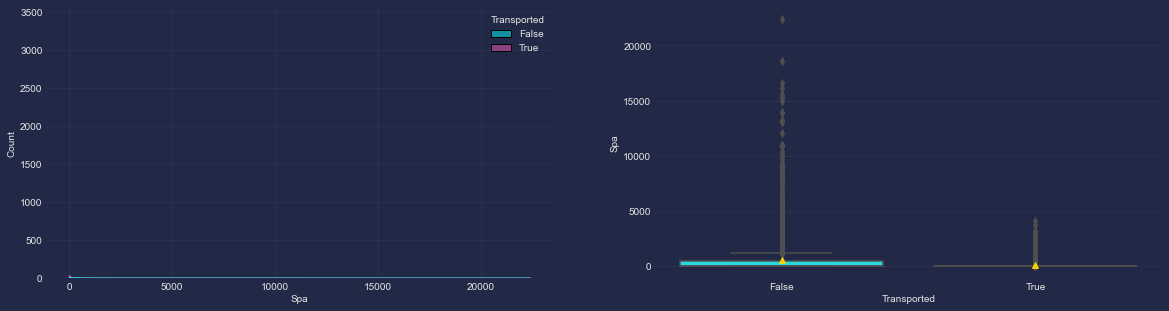

In [16]:
# histogram
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x="Spa", hue="Transported", binwidth=1, kde=True);

# box plot
plt.subplot(1,2,2)
sns.boxplot(data=train_df, x="Transported", y="Spa",showmeans=True);
plt.show()


In [17]:
train_df.groupby(['Transported'])['Spa'].describe().T

Transported,False,True
count,4223.000000,4287.000000
mean,564.382666,61.675531
std,1551.356047,262.682871
min,0.000000,0.000000
25%,0.000000,0.000000
50%,4.000000,0.000000
75%,453.500000,0.000000
max,22408.000000,4103.000000


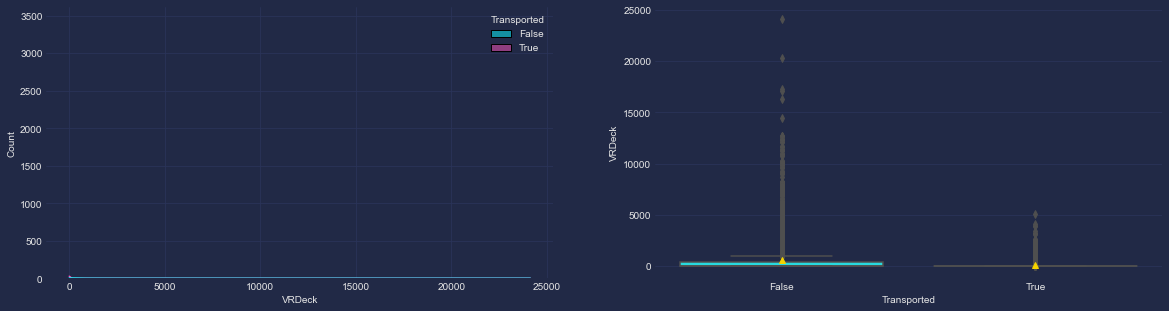

In [18]:
# histogram
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=train_df, x="VRDeck", hue="Transported", binwidth=1, kde=True);

# box plot
plt.subplot(1,2,2)
sns.boxplot(data=train_df, x="Transported", y="VRDeck",showmeans=True);
plt.show()

In [19]:
train_df.groupby(['Transported'])['VRDeck'].describe().T

Transported,False,True
count,4225.000000,4280.000000
mean,543.629822,69.148131
std,1563.088368,291.658171
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,388.000000,0.000000
max,24133.000000,5063.000000


- RoomService, ShoppingMall, Spa and VrDeck having slightly higher proportion of people Transported when customer paid more for these services.
- Foodcourt does not have any impact if customer paid more for Food court service.

<AxesSubplot:>

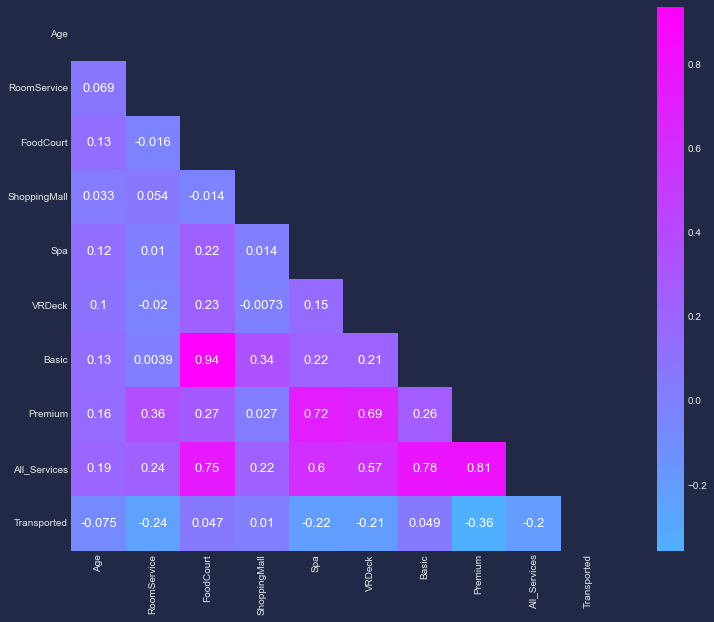

In [20]:
for dataset in df:
    dataset['Premium'] = dataset['RoomService'] + dataset['Spa'] + dataset['VRDeck']
    dataset['Basic'] = dataset['FoodCourt'] + dataset['ShoppingMall']
    dataset['All_Services'] = dataset['RoomService'] + dataset['Spa'] + dataset ['VRDeck'] + dataset['FoodCourt'] + dataset['ShoppingMall']

df_num = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Basic', 'Premium', 'All_Services', 'Transported']]

plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

- I am rooting Premium for now, since its correlation -0.36 seems promising. Should I choose to keep it, other features that are multicolliner with Premium will be removed.
- Let's try normalizing the highly skewed numerical features and see if it improves the correlation.

#### **Creating 'AgeGroup' Feature**
Before classifying our 'Age' group into bins, we fill the missing values with mean as it follows normal distribution.

In [21]:
# Divide 'Age' into four groups
for dataset in df:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
    dataset['AgeGroup'] = pd.cut(dataset['Age'], 5)
    
train_df[['AgeGroup', 'Transported']].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Transported
0,"(-0.079, 15.8]",0.648387
1,"(15.8, 31.6]",0.475495
2,"(31.6, 47.4]",0.485510
3,"(47.4, 63.2]",0.486747
4,"(63.2, 79.0]",0.463235


In [22]:
# Converting 'AgeGroup' into a Categorical Variable
for dataset in df:
    dataset.loc[dataset['Age'] <= 15, 'AgeGroupNum'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 31), 'AgeGroupNum'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 47), 'AgeGroupNum'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'AgeGroupNum'] = 3
    dataset.loc[(dataset['Age'] > 63), 'AgeGroupNum'] = 4

train_df['AgeGroupNum'].unique()

array([2., 1., 3., 0., 4.])

#### Transforming Numerical Variables¶
- The probability plot or quantile-quantile plot (QQplot) allows us to plot our sample data against the quantiles of a normal distribution. In a nutshell, the objective is to have all the points lie along the line in the QQplot.
- Before doing that, let's first fill up our missing numerical values with median.

In [23]:

for dataset in df:
    dataset['RoomService'] = dataset['RoomService'].fillna(train_df['RoomService'].median())
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(train_df['FoodCourt'].median())
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(train_df['ShoppingMall'].median())
    dataset['Spa'] = dataset['Spa'].fillna(train_df['Spa'].median())
    dataset['VRDeck'] = dataset['VRDeck'].fillna(train_df['VRDeck'].median())
    
    dataset['Premium'] = dataset['RoomService'] + dataset['Spa'] + dataset['VRDeck']
    dataset['Basic'] = dataset['FoodCourt'] + dataset['ShoppingMall']
    dataset['All_Services'] = dataset['RoomService'] + dataset['Spa'] + dataset ['VRDeck'] + dataset['FoodCourt'] + dataset['ShoppingMall']

import scipy.stats as stats

# Defining the function to generate the distribution plot alongside QQplot
def QQplot(df, col):
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col], kde=True)
    
    plt.subplot(1,2,2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()
    
df_services = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Premium', 'All_Services', 'Transported']]

- I will present the analysis the 'RoomService' feature as a working example for visualizing and interpreting the QQplots. As shown below is the baseline of the 'RoomService' 's distribution in the form of QQplot.

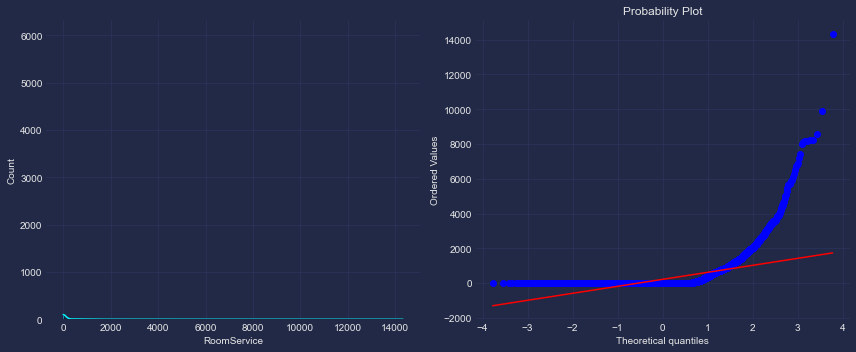

In [24]:
QQplot(df_services, 'RoomService')

Afterwards, we can proceed to transform our data and assess its fit in the QQplots once more. Here, I chose to try the following data transformations.
- square root
- cube root
- logarithmic ( log(x+1))

C:\Users\chand\AppData\Local\Temp\ipykernel_10724\624151218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RoomService_tr["RoomService_sqrt"] = RoomService_tr['RoomService']**(1./2)
C:\Users\chand\AppData\Local\Temp\ipykernel_10724\624151218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RoomService_tr["RoomService_cbrt"] = RoomService_tr['RoomService']**(1./3)
C:\Users\chand\AppData\Local\Temp\ipykernel_10724\624151218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

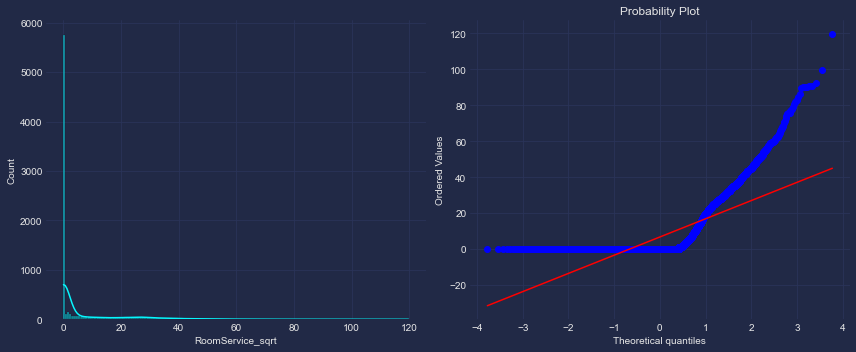

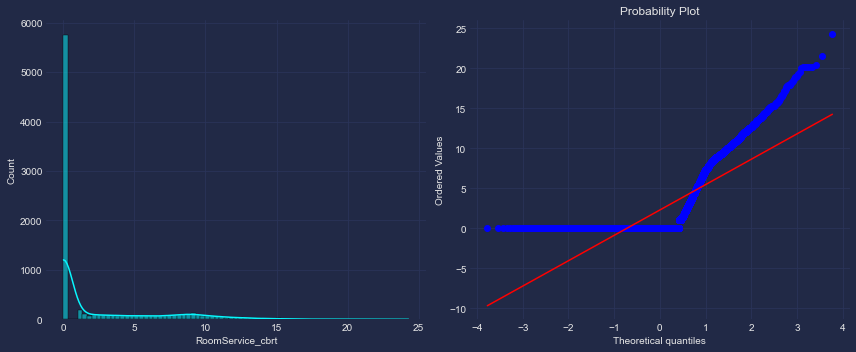

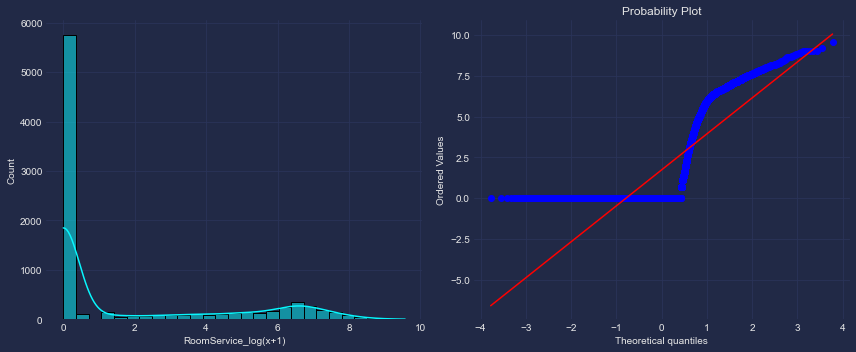

In [25]:
RoomService_tr = df_services[['RoomService', 'Transported']]

RoomService_tr["RoomService_sqrt"] = RoomService_tr['RoomService']**(1./2)
RoomService_tr["RoomService_cbrt"] = RoomService_tr['RoomService']**(1./3)
RoomService_tr["RoomService_log(x+1)"] = np.log(RoomService_tr['RoomService']+1)

QQplot(RoomService_tr, 'RoomService_sqrt')
QQplot(RoomService_tr, 'RoomService_cbrt')
QQplot(RoomService_tr, 'RoomService_log(x+1)')

- After transformation, it is usually a good practice to check the correlation once more if there are any improvements. As shown below, the best performing transfortion log(x+1) improved the correlation from -0.24 to -0.36.

<AxesSubplot:>

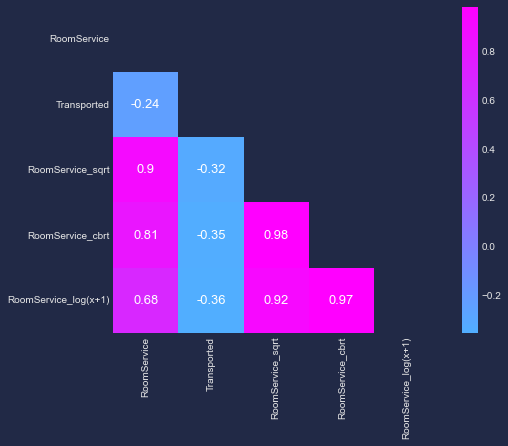

In [26]:
plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(RoomService_tr.corr()))
sns.heatmap(RoomService_tr.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

- I can do the same technique with the rest of the features, but for now, I will apply log transformation on my remaining numerical features right away without having to go through this evaluation process as I already know that log transformation usually performs the best on highly skewed distributions.

<AxesSubplot:>

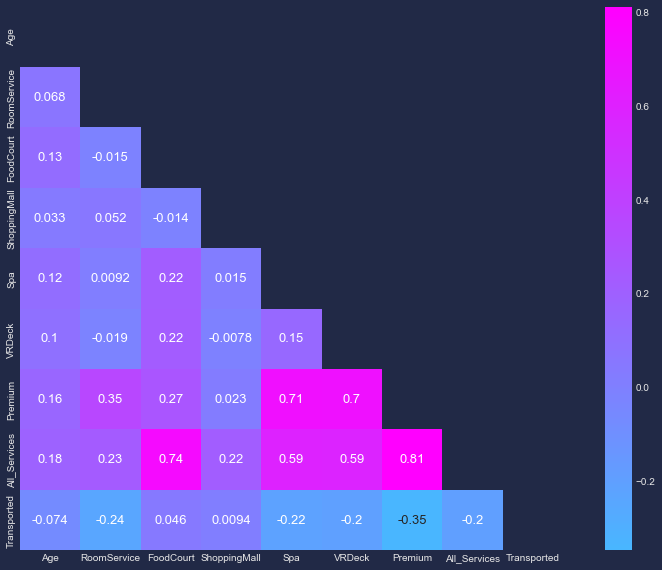

In [27]:
train_df_copy = train_df.copy()

train_df_copy['RoomService'] = np.log(train_df_copy['RoomService'] + 1)
train_df_copy['FoodCourt'] = np.log(train_df_copy['FoodCourt'] + 1)
train_df_copy['ShoppingMall'] = np.log(train_df_copy['ShoppingMall'] + 1)
train_df_copy['Spa'] = np.log(train_df_copy['Spa'] + 1)
train_df_copy['VRDeck'] = np.log(train_df_copy['VRDeck'] + 1)
train_df_copy['Premium'] = np.log(train_df_copy['Premium'] + 1)
train_df_copy['All_Services'] = np.log(train_df_copy['All_Services'] + 1)
    
df_num = train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Premium', 'All_Services', 'Transported']]

plt.subplots(figsize=(15,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True)

### Observations
- It is more colorful.
- There is an issue here, although the correlation with our solution goal improved, this backfired because there are now many input features that become highly dependent with one another. This is also known as multicollinearity.
#### Decisions
- I want to keep Premium feature, so I need to remove RoomService, Spa, and VRDeck features to address multicollinearity.
- As for All_Services, we can try converting this into a categorical feature Spent where (1=spent, 0=didn't spend)

#### Creating Spent Feature.

In [28]:
for dataset in df:
    dataset['Spent'] = 0
    dataset.loc[dataset['All_Services'] > 0, 'Spent'] = 1

#### Categorical Variables
- Before we visualize them, let's fill up our missing values in each feature with their corresponding mode, which is the most common label in the existing feature.

In [29]:
df_cat = train_df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'AgeGroupNum', 'Spent']]

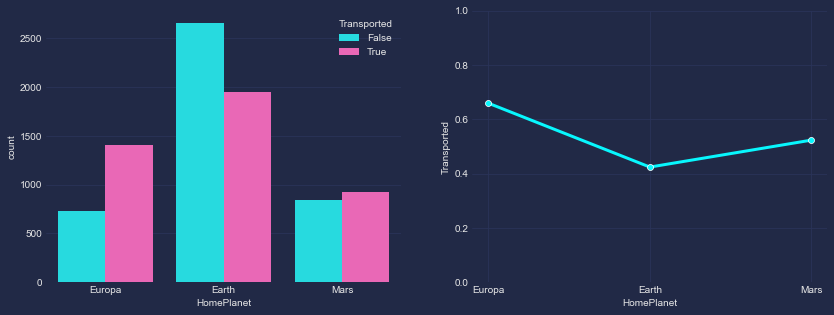

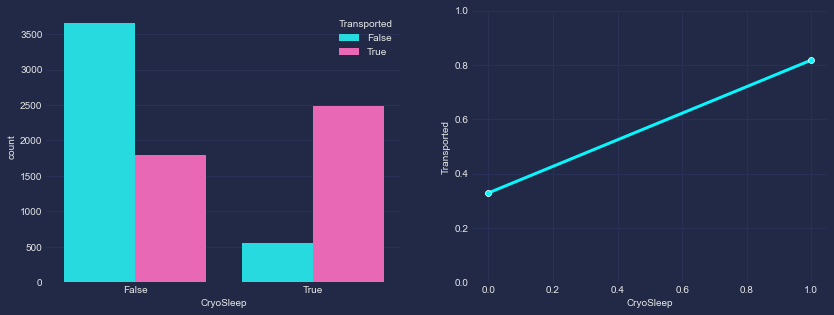

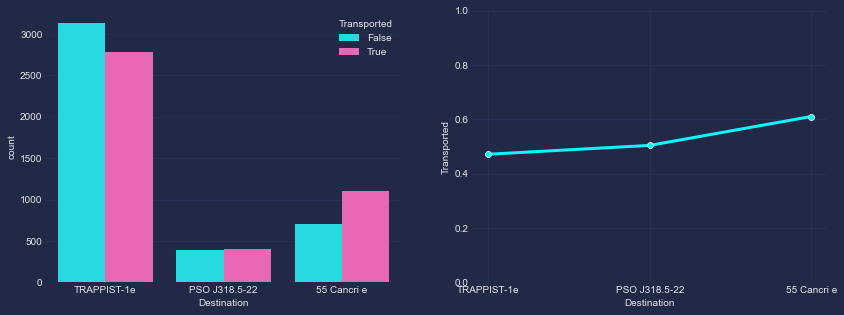

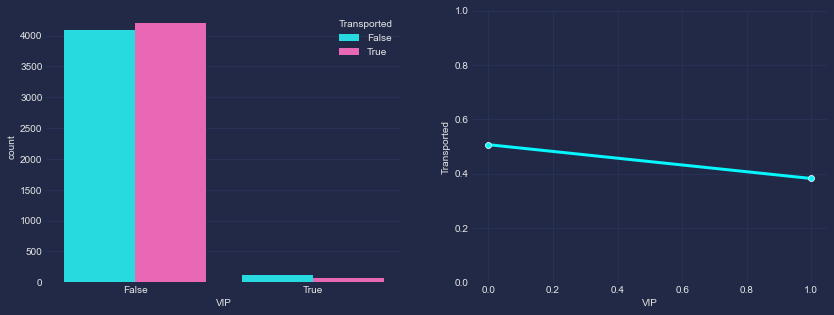

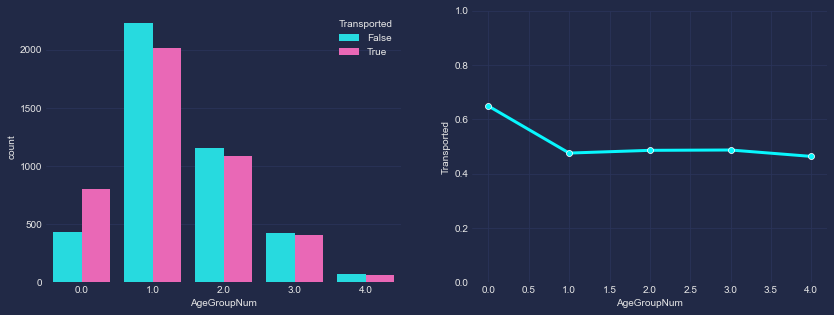

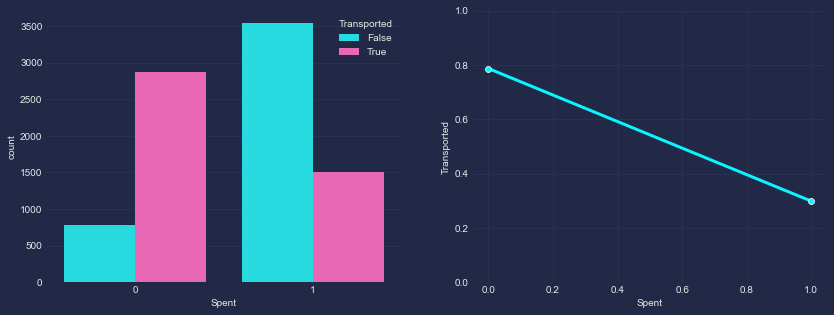

In [30]:
def Catplot(df, x, y):
    plt.subplots(1, 2, figsize = (14, 5))
    plt.subplot(1,2,1)
    sns.countplot( x=df[x].dropna(), hue=df[y])
        
    plt.subplot(1,2,2)
    plt.ylim(0,1)
    sns.lineplot( x=df[x], y=df[y], data=df, ci=None, linewidth=3, marker="o")
    plt.show()


Catplot(df_cat, 'HomePlanet', 'Transported')
Catplot(df_cat, 'CryoSleep', 'Transported')
Catplot(df_cat, 'Destination', 'Transported')
Catplot(df_cat, 'VIP', 'Transported')
Catplot(df_cat, 'AgeGroupNum', 'Transported')
Catplot(df_cat, 'Spent', 'Transported')

In [31]:
#### Stacked bar charts for Categoricial features against the target variable.
from math import *
import math

def percentage_stacked_plot(columns_to_plot):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(16, 5 * number_of_rows)) 
    #fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(train_df[column], train_df['Transported']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['#52C9D2','#CD6CB5'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Transported', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

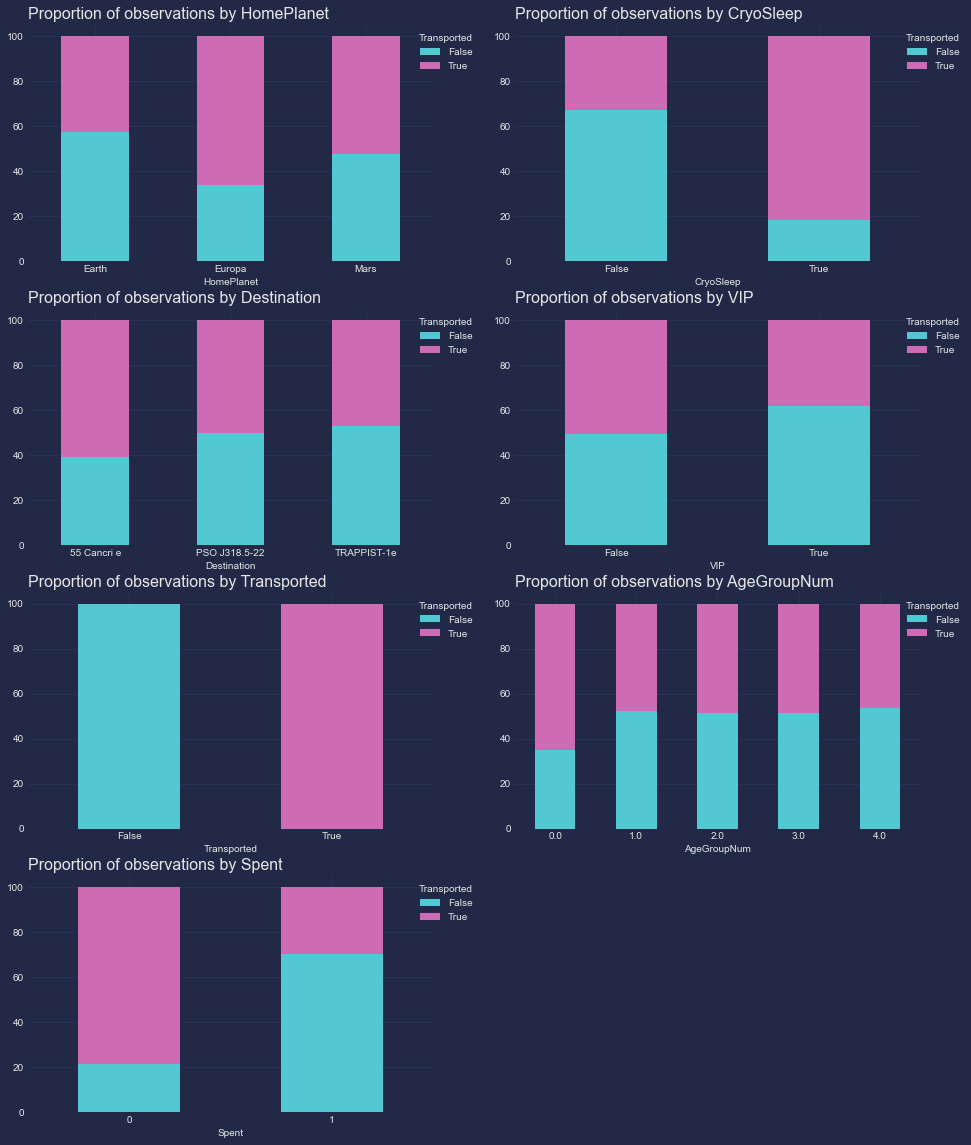

In [32]:
# Columns to view
df_cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'AgeGroupNum', 'Spent']

# stacked plot
percentage_stacked_plot(df_cat)

### HomePlanet
- Most came from Earth as their home planet.
- Transport rate is highest with Europa, followed by Mars, then Earth.


#### CryoSleep
- Most passengers didn't undergo cryosleep.
- Those who underwent cryosleep had a higher transport rate.

#### Destination
- The most number of passengers seeked to debark to TRAPPIST-1e, followed 55 Cancri, then PSO.
- Highest transport rate at 55 Cancri, followed by PSO, then TRAPPIST-1e.

#### VIP
- Barely any members who subsribed to VIP service.
- Doesn't really resemble any association in terms of the transport rate.

#### AgeGroupNum
- Varying transport rates across the AgeGroupNum distribution. Higher transport rates among <15 yr old group relatively compared to the rest.

#### Spent
- Those who didn't spend were more likely to be transported.

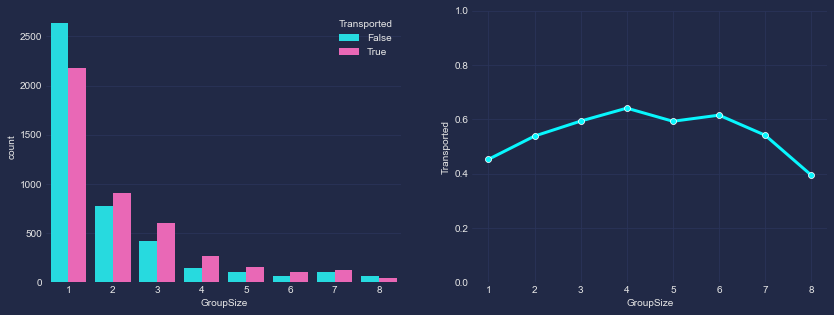

In [33]:
# Splitting PassengerId into 'Group' and 'GroupSize'

for dataset in df:
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['GroupSize'] = dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

Catplot(train_df, 'GroupSize', 'Transported')

#### GroupSize
- Large number of passengers traveled alone, the volume exponentially decreases with larger group sizes.
- GroupSize of 4 followed by 6 had the highest transport rates.
- GroupSize of 8 followed by alone passengers had the lowest transport rates.
- It apppears that a large number of passengers taveled alone. We can create a new categorical feature withGroup where (0=alone, 1=with group)

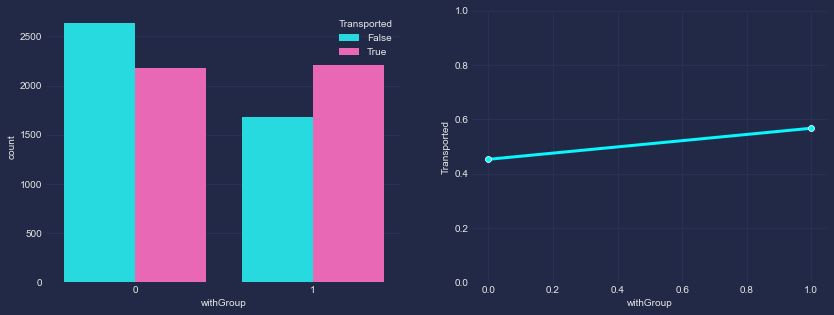

In [34]:
for dataset in df:
    dataset['withGroup'] = 1
    dataset.loc[dataset['GroupSize'] == 1, 'withGroup'] = 0

Catplot(train_df, 'withGroup', 'Transported')

#### WithGroup
- Those who were with a group were likely to be transported by a small margin.

In [35]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Premium,Basic,All_Services,AgeGroup,AgeGroupNum,Spent,Group,GroupSize,withGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,0.0,0.0,"(15.8, 31.6]",1.0,0,13,1,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2823.0,9.0,2832.0,"(15.8, 31.6]",1.0,1,18,1,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,0.0,0.0,"(15.8, 31.6]",1.0,0,19,1,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,766.0,6652.0,7418.0,"(31.6, 47.4]",2.0,1,21,1,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,10.0,635.0,645.0,"(15.8, 31.6]",1.0,1,23,1,0


In [36]:
# Splitting Cabin into Deck, Num, and Side

for dataset in df:
    dataset['Deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0] if (str(x)) != 'nan' else x)
    dataset['Num'] = dataset['Cabin'].apply(lambda x: x.split('/')[1] if (str(x)) != 'nan' else x)
    dataset['Side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2] if (str(x)) != 'nan' else x)

In [37]:
# Lets create a function for stacked bar charts to compare the Target variable agains the other independent variable.

colors = ['#52C9D2','#CD6CB5'] # color of the bars


def stacked_bar(feature):
    
    tab=pd.crosstab(feature,train_df["Transported"],margins=True)
    print(tab)
    print('-'*120)
    
    tab1=pd.crosstab(feature,train_df["Transported"],normalize='index')
    tab1.plot(kind='bar',stacked=True,figsize=(10,5),edgecolor='white',color=colors)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1),edgecolor='white')
    plt.xticks(rotation=0);

Transported  False  True   All
Deck                          
A              129   127   256
B              207   572   779
C              239   508   747
D              271   207   478
E              563   313   876
F             1565  1229  2794
G             1238  1321  2559
T                4     1     5
All           4216  4278  8494
------------------------------------------------------------------------------------------------------------------------


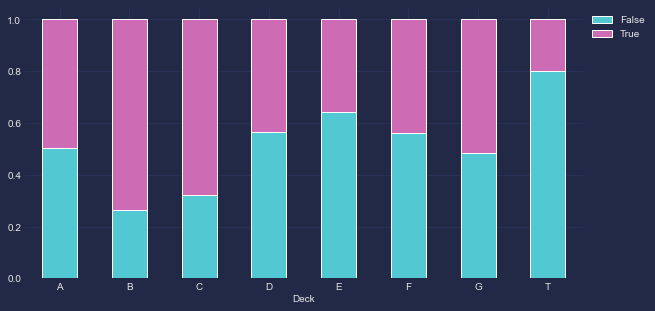

In [38]:
stacked_bar(train_df["Deck"])

Transported  False  True   All
Side                          
P             2308  1898  4206
S             1908  2380  4288
All           4216  4278  8494
------------------------------------------------------------------------------------------------------------------------


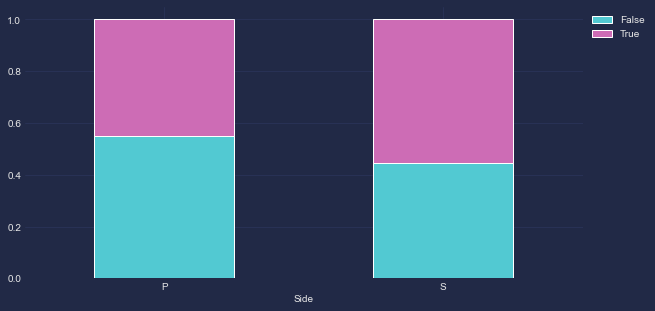

In [39]:
stacked_bar(train_df["Side"])

#### Deck
- Majority of passengers resided in Cabins F and G.
- Highest transport rate among Cabin B passengers, followed by those of Cabin C.
- Lowest transort rate among Cabin T passengers, but data is not representative enough.
#### Side
- Side S dominates transport rate by a small margin over Side P.

In [40]:
# Splitting Name into First and Last Names
for dataset in df:
    dataset['FirstName'] = dataset['Name'].apply(lambda x: x.split(' ')[0] if (str(x)) != 'nan' else x)
    dataset['LastName'] = dataset['Name'].apply(lambda x: x.split(' ')[1] if (str(x)) != 'nan' else x)

In [41]:
# Creating 'FamilySize' from 'LastName'
# assign the value counts to Familysize based on the number of appearance of Last name.
for dataset in df:
    dataset['FamilySize'] = dataset['LastName'].map(lambda x: dataset['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)

Transported  False  True   All
FamilySize                    
1.0            159   223   382
2.0            405   395   800
3.0            542   622  1164
4.0            635   645  1280
5.0            628   652  1280
6.0            520   518  1038
7.0            432   401   833
8.0            297   247   544
9.0            163   152   315
10.0           147   153   300
11.0           136   139   275
12.0            48    36    84
13.0            42    36    78
14.0            29    27    56
15.0            12    18    30
16.0            10     6    16
18.0            11     7    18
All           4216  4277  8493
------------------------------------------------------------------------------------------------------------------------


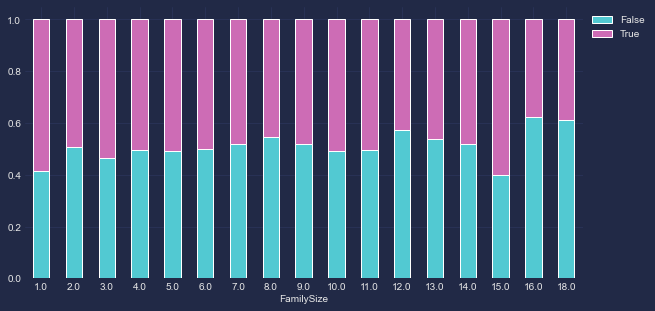

In [42]:
stacked_bar(train_df["FamilySize"])

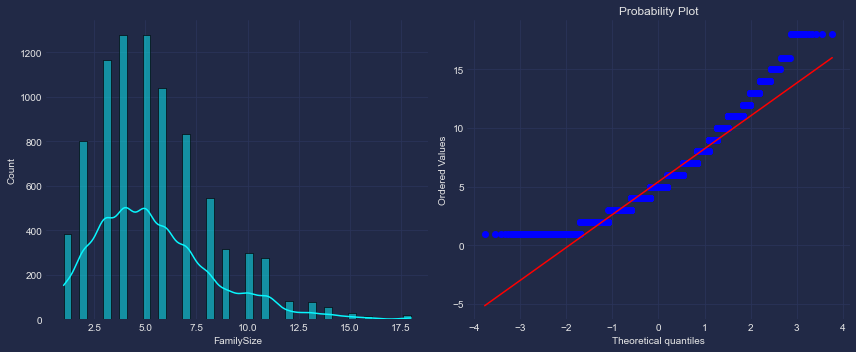

In [43]:
QQplot(train_df, 'FamilySize')

#### FamilySize
- Distribution is skewed to the right.
- FamilySizes of 3, 4, 5 and 6 comprise the majority (check above table).
- Transport rate appears to steadily decline with increasing FamilySize, but with the exception of FamilySize 15.

#### Decisions
- This can be treated as a numerical feature because it seems to have a linear relationship with our solution goal.

#### Normalizing Family size

C:\Users\chand\AppData\Local\Temp\ipykernel_10724\1685737983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FamilySize_tr["FamilySize_sqrt"] = FamilySize_tr['FamilySize']**(1./2)
C:\Users\chand\AppData\Local\Temp\ipykernel_10724\1685737983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FamilySize_tr["FamilySize_cbrt"] = FamilySize_tr['FamilySize']**(1./3)
C:\Users\chand\AppData\Local\Temp\ipykernel_10724\1685737983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

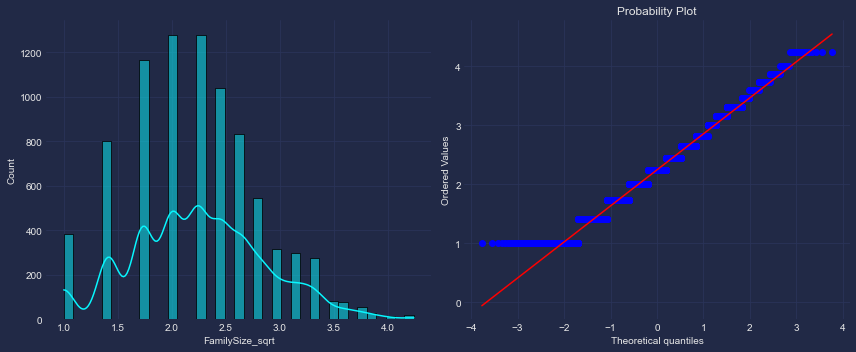

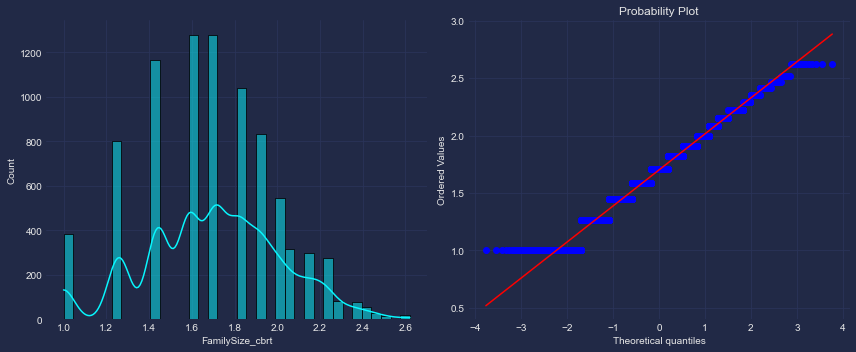

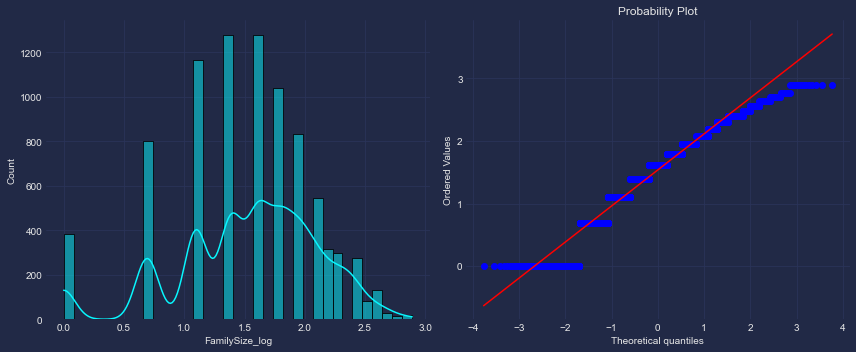

In [44]:
FamilySize_tr = train_df[['FamilySize', 'Transported']]

FamilySize_tr["FamilySize_sqrt"] = FamilySize_tr['FamilySize']**(1./2)
FamilySize_tr["FamilySize_cbrt"] = FamilySize_tr['FamilySize']**(1./3)
FamilySize_tr["FamilySize_log"] = np.log(FamilySize_tr['FamilySize'])

QQplot(FamilySize_tr, 'FamilySize_sqrt')
QQplot(FamilySize_tr, 'FamilySize_cbrt')
QQplot(FamilySize_tr, 'FamilySize_log')

- This is one of the circumstances where log transform performed poorly. Sqrt transformation yielded the best fit. With that out of the way, we can proceed to transform our data for real.

In [45]:
to_log_transform = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Premium', 'Basic', 'All_Services']

# Log Transform Num Values
for dataset in df:
    for i in to_log_transform:
        dataset[i] = np.log(dataset[i]+1)

#### Associating Categorical Variables
In terms of statistics terminologies, it is NOT usually appropriate to use the term correlation when testing with categorical variables. We can't really assess the magnitude or the strength of correlation between predictor and response categorical variables, unless if they are either dichotomous (categorical variables having 2 categories like Male and Female) or ordinal variables then it is allowed to use Pearson's correlation.

This means that we can still evaluate CryoSleep, VIP against our target Transported with Pearson's correlation.

The rest of our categorical features are either non-ordinal or contain more than 2 categories. Instead of conducting correlation tests, it is more appropriate to use tests of independency to assess the strength of association between cateorical variables. The one I will use is Cramer's V correlation, which is based from Chi-square test.

The intention to using Cramer's V over the usual Chi-square is that it applies to categorical variables with two or more labels. For the sake of uniformity, I will apply the correlation among my dichotomous variabes as well (i.e. CryoSleep, VIP).

Before we can conduct Chi-square tests, we must ensure that our categorical data are numerically encoded first using LabelEncoder().

In [46]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Premium,Basic,All_Services,AgeGroup,AgeGroupNum,Spent,Group,GroupSize,withGroup,Deck,Num,Side,FirstName,LastName,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,3.688879,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,0.000000,0.000000,0.000000,"(31.6, 47.4]",2.0,0,1,1,0,B,0,P,Maham,Ofracculy,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,3.218876,False,4.700480,2.302585,3.258097,6.309918,3.806662,Juanna Vines,True,6.555357,3.555348,6.602588,"(15.8, 31.6]",1.0,1,2,1,0,F,0,S,Juanna,Vines,4.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,4.077537,True,3.784190,8.182280,0.000000,8.812248,3.912023,Altark Susent,False,8.825854,8.182280,9.248021,"(47.4, 63.2]",3.0,1,3,2,1,A,0,S,Altark,Susent,6.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,3.526361,False,0.000000,7.157735,5.918894,8.110728,5.267858,Solam Susent,False,8.167068,7.411556,8.551981,"(31.6, 47.4]",2.0,1,3,2,1,A,0,S,Solam,Susent,6.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,2.833213,False,5.717028,4.262680,5.023881,6.338594,1.098612,Willy Santantines,True,6.769642,5.402677,6.995766,"(15.8, 31.6]",1.0,1,4,1,0,F,1,S,Willy,Santantines,6.0


In [47]:
# Encoding categorical labels
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

df1 = train_df.copy()
df_cat = df1[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Num', 'Side', 'AgeGroupNum', 'Spent', 'Group', 'withGroup', 'LastName', 'Transported']]

label = LabelEncoder()
df_cat_encoded = pd.DataFrame()

for i in df_cat.columns:
    df_cat_encoded[i] = label.fit_transform(df_cat[i])
    
df_cat_encoded.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Num,Side,AgeGroupNum,Spent,Group,withGroup,LastName,Transported
0,1,0,2,0,1,0,0,2,0,0,0,1431,0
1,0,0,2,0,5,0,1,1,1,1,0,2109,1
2,1,0,2,1,0,0,1,3,1,2,1,1990,0
3,1,0,2,0,0,0,1,2,1,2,1,1990,0
4,0,0,2,0,5,1,1,1,1,3,0,1778,1


In [48]:
from scipy.stats.contingency import association       
    
def Cramers_V(var1, var2) :
  crosstab = np.array(pd.crosstab(index=var1, columns=var2)) # Cross Tab
  return (association(crosstab, method='cramer'))            # Return Cramer's V

# Create the dataFrame matrix with the returned Cramer's V
rows = []

for var1 in df_cat_encoded:
    col = []

    for var2 in df_cat_encoded:
        V = Cramers_V(df_cat_encoded[var1], df_cat_encoded[var2]) # Return Cramer's V
        col.append(V)                                             # Store values to subsequent columns  
    rows.append(col)                                              # Store values to subsequent rows
  
CramersV_results = np.array(rows)
CramersV_df = pd.DataFrame(CramersV_results, columns = df_cat_encoded.columns, index = df_cat_encoded.columns)

In [49]:
# view contigency table
CramersV_df.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Num,Side,AgeGroupNum,Spent,Group,withGroup,LastName,Transported
HomePlanet,1.000000,0.082681,0.210629,0.123343,0.601839,0.560443,0.032846,0.131687,0.095942,0.947835,0.268329,0.847575,0.193346
CryoSleep,0.082681,1.000000,0.085539,0.057479,0.232860,0.448224,0.025092,0.077203,0.867951,0.831278,0.096395,0.505690,0.462781
Destination,0.210629,0.085539,1.000000,0.033541,0.198094,0.471038,0.015424,0.036834,0.090372,0.864737,0.120296,0.532707,0.110631
VIP,0.123343,0.057479,0.033541,1.000000,0.139875,0.419921,0.011208,0.064208,0.087234,0.834541,0.034082,0.541714,0.037305
Deck,0.601839,0.232860,0.198094,0.139875,1.000000,0.558494,0.707892,0.153286,0.381768,0.952094,0.255958,0.696175,0.212431


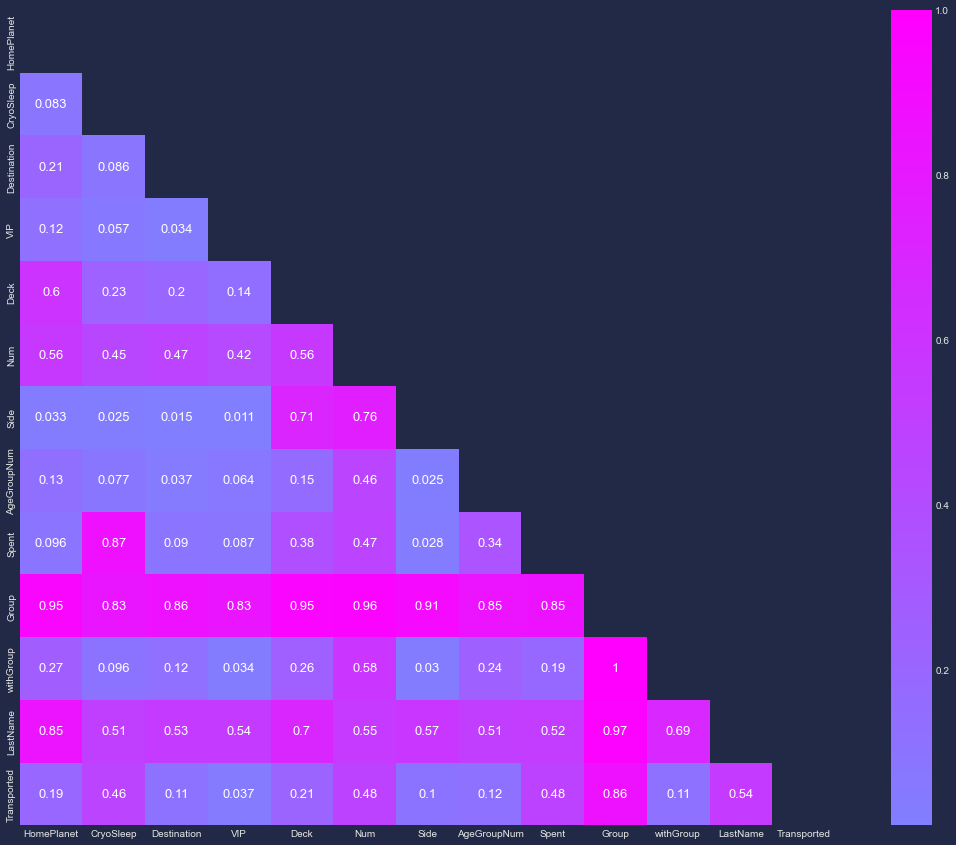

In [50]:
plt.subplots(figsize=(20,15))
corr = np.corrcoef(np.random.randn(13, 13))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(CramersV_df, mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, center=0, square=True);

- There is a lot to dig in here because my approach to feature engineering was rather exhaustive. As a result, multicollinearity tend to occur, this happens when two or more independent variables are highly associated with one another, rendering them redundant.
- This association matrix will actually help us later on by filling up missing categorical values based on correlated features.

#### Missing Values
- By answering these questions, we also stand to gain relevant insights and patterns which we can apply to our imputation method. Guess what, since we created our association matrix above, we already know which features and other correspoding interrelated features to look out for. Below are just some questions that we are particularly interested in.

- **PassengerId group vs Name (last name)**. Assuming they are family, it is more probable that most have similar last names.
- **PassengerId group (gggg=group, pp=number) vs HomePlanet and Destination.** Did passengers within their groups travel together, which means coming from the same HomePlanet and debarking to the same Destination.
- **PassengerId group vs Cabin.** Do people of the same group stay in the same cabin?
- **Cryosleep vs Cabin.** Does a cryosleep facility have its designated cabin area?
- **CryoSleep vs Services.** Did passengers who elected to cryosleep have lower expenditures?
- **CryoSleep vs withGroup.** Were those who traveled alone in the group likely to undergo CryoSleep?
- **CryoSleep vs HomePlanet and Destination.** Is there a pattern among passengers who cryoslept with respect to longer travels (can possibly infer that distances are farther between HomePlanet vs Destination)
- **VIP vs Services.** How the services and expenditures from VIP members differ from non-VIPs?

In [51]:
# Define function to impute based on a feature
def impute_cat(var1, var2):
    print('Before %s Train:' %var2, train_df[var2].isnull().sum())
    print('Before %s Test:' %var2, test_df[var2].isnull().sum())

    test_df['Transported'] = np.NaN
    df_full = pd.concat([train_df, test_df])

    reference = df_full.groupby([var1, var2])[var2].size().unstack().fillna(0)

    for dataset in df:          
        index = dataset[dataset[var2].isnull()][(dataset.loc[dataset[var2].isnull()][var1]).isin(reference.index)].index
        dataset.loc[index, var2] = dataset.loc[index, var1].map(lambda x: reference.idxmax(axis=1)[x])
    
    print('After %s Train:' %var2, train_df[var2].isnull().sum())
    print('After %s Test:' %var2, test_df[var2].isnull().sum())
    print('\n')

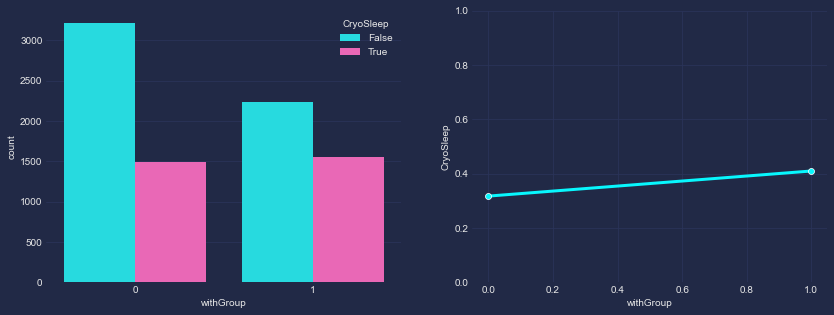

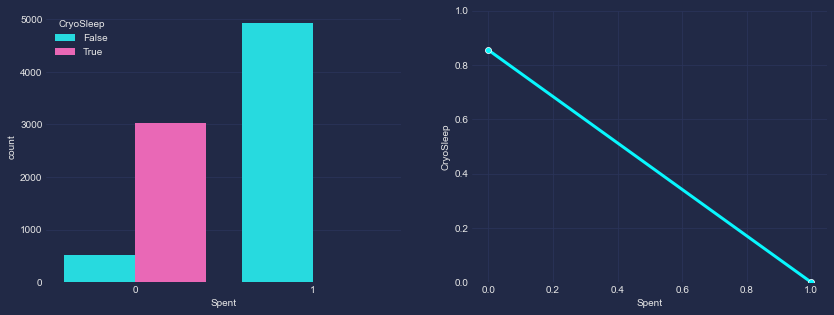

In [52]:
Catplot(train_df, 'withGroup', 'CryoSleep')
Catplot(train_df, 'Spent', 'CryoSleep')

-  Since Cryosleep is strongly associted with Spent, we will impute Cryosleep as False if spent is 1, then True otherwise.

In [53]:
print('Before Train:', train_df['CryoSleep'].isnull().sum())
print('Before Test:', test_df['CryoSleep'].isnull().sum())

for dataset in df:
    dataset.loc[(dataset.CryoSleep.isnull()) & (dataset.Spent == 0), 'CryoSleep' ] = True
    dataset.loc[(dataset.CryoSleep.isnull()) & (dataset.Spent == 1), 'CryoSleep' ] = False


print('After Train:', train_df['CryoSleep'].isnull().sum())
print('After Test:', test_df['CryoSleep'].isnull().sum())

Before Train: 217
Before Test: 93
After Train: 0
After Test: 0


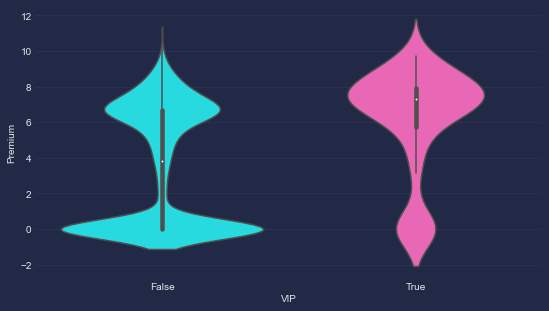

In [54]:
# How VIP spend on services
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(data=train_df, x="VIP", y='Premium');

-  It appears that VIP passengers tend to spend more on premium services. For now, I will impute by mode.

In [55]:
print('Before Train:', train_df['VIP'].isnull().sum())
print('Before Test:', test_df['VIP'].isnull().sum())

for dataset in df:
    dataset['VIP'].fillna(False, inplace=True)
    
print('After Train:', train_df['VIP'].isnull().sum())
print('After Test:', test_df['VIP'].isnull().sum())

Before Train: 203
Before Test: 93
After Train: 0
After Test: 0


#### Imputing Cabin Deck and Side

In [56]:
CD_PG = train_df.groupby(['Group', 'Deck'])['Deck'].size().unstack().fillna(0)
CD_PG.head(10)

Deck,A,B,C,D,E,F,G,T
Group,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- We discovered that passengers of the same group stay in the same cabin deck.

In [57]:
# Imputing Deck
impute_cat('Group', 'Deck')
impute_cat('Group', 'Side')

Before Deck Train: 199
Before Deck Test: 100


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After Deck Train: 99
After Deck Test: 100


Before Side Train: 199
Before Side Test: 100


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After Side Train: 99
After Side Test: 63




-  Impute Deck based on 2nd most highly associated feature LastName. Navigate here.

#### Imputing Homeplanet and Destination

In [58]:
HP_PG = train_df.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
HP_PG.head(10)

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,2.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,3.0,0.0
9,0.0,0.0,1.0


In [59]:
D_PG = train_df.groupby(['Group', 'Destination'])['Destination'].size().unstack().fillna(0)
D_PG.head(10)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Group,,,
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,2.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,2.0
7,0.0,0.0,1.0
8,2.0,0.0,1.0
9,0.0,0.0,1.0


- The passengers within each group have the same HomePlanet and Destinations. Given this premise, we can impute missing values in HomePlanet by returning the column name (Earth, Europa, Mars) with the positive number of passengers, as a function of 'Group'. The same imputation process can be done for missing values in 'Destination'.

In [60]:
# Impute HomePlanet and Destination
impute_cat('Group', 'HomePlanet')
impute_cat('Group', 'Destination')

Before HomePlanet Train: 201
Before HomePlanet Test: 87


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After HomePlanet Train: 111
After HomePlanet Test: 46


Before Destination Train: 182
Before Destination Test: 92


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After Destination Train: 103
After Destination Test: 51




- There are still remaining missing values that weren't filled, so my strategy now is to impute them based on the succeeding features that are highly associated to HomePlanet and Destination.
-  Impute HomePlanet and Destination based from 2nd most associated feature LastName

In [61]:
LN_HP = train_df.groupby(['LastName', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
LN_HP.head(10)

HomePlanet,Earth,Europa,Mars
LastName,,,
Acobson,4.0,0.0,0.0
Acobsond,3.0,0.0,0.0
Adavisons,9.0,0.0,0.0
Adkinson,3.0,0.0,0.0
Admingried,0.0,4.0,0.0
Aginge,0.0,1.0,0.0
Ailled,0.0,2.0,0.0
Aillyber,0.0,3.0,0.0
Aiming,0.0,1.0,0.0


In [62]:
impute_cat('LastName', 'HomePlanet')
impute_cat('LastName', 'Destination')

Before HomePlanet Train: 111
Before HomePlanet Test: 46


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After HomePlanet Train: 8
After HomePlanet Test: 5


Before Destination Train: 103
Before Destination Test: 51


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After Destination Train: 4
After Destination Test: 2




-  Impute HomePlanet and Destination based from 3rd most associated feature Deck

In [63]:
CD_HP = train_df.groupby(['Deck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
CD_HP.head(10)

HomePlanet,Earth,Europa,Mars
Deck,,,
A,0.0,261.0,0.0
B,0.0,796.0,0.0
C,0.0,760.0,0.0
D,0.0,195.0,291.0
E,406.0,135.0,344.0
F,1656.0,0.0,1150.0
G,2587.0,0.0,0.0
T,0.0,5.0,0.0


In [64]:
impute_cat('Deck', 'HomePlanet')
impute_cat('Deck', 'Destination')

Before HomePlanet Train: 8
Before HomePlanet Test: 5
After HomePlanet Train: 0
After HomePlanet Test: 0


Before Destination Train: 4
Before Destination Test: 2
After Destination Train: 0
After Destination Test: 0




C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])
C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


#### Analyzing Cabin Deck, Side vs HomePlanet and Destination

In [65]:
HP_D_CS_CD = train_df.groupby(['HomePlanet', 'Destination', 'Spent', 'Deck'])['Deck'].size().unstack().fillna(0)
HP_D_CS_CD.head(20)

Deck                               A      B      C      D      E       F  \
HomePlanet Destination   Spent                                             
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0    4.0     6.0   
                         1       0.0    0.0    0.0    0.0   45.0   271.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0    3.0     5.0   
                         1       0.0    0.0    0.0    0.0   26.0   224.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0   19.0    14.0   
                         1       0.0    0.0    0.0    0.0  309.0  1140.0   
Europa     55 Cancri e   0      39.0  217.0  160.0   32.0   26.0     0.0   
                         1      75.0  133.0  169.0   36.0   24.0     0.0   
           PSO J318.5-22 0       1.0    1.0    7.0    0.0    0.0     0.0   
                         1       1.0    2.0    7.0    0.0    0.0     0.0   
           TRAPPIST-1e   0      52.0  263.0  162.0   43.0   32.0     0.0   
                         1      94.0  180.0  256.0   84.0   53.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   12.0    7.0    78.0   
                         1       0.0    0.0    0.0   36.0   14.0    53.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0    9.0     4.0   
                         1       0.0    0.0    0.0   17.0    4.0    16.0   
           TRAPPIST-1e   0       0.0    0.0    0.0   24.0  138.0   554.0   
                         1       0.0    0.0    0.0  203.0  172.0   445.0   

Deck                                 G    T  
HomePlanet Destination   Spent               
Earth      55 Cancri e   0       283.0  0.0  
                         1        94.0  0.0  
           PSO J318.5-22 0       375.0  0.0  
                         1        93.0  0.0  
           TRAPPIST-1e   0      1042.0  0.0  
                         1       701.0  0.0  
Europa     55 Cancri e   0         0.0  0.0  
                         1         0.0  0.0  
           PSO J318.5-22 0         0.0  0.0  
                         1         0.0  0.0  
           TRAPPIST-1e   0         0.0  0.0  
                         1         0.0  5.0  
Mars       55 Cancri e   0         0.0  0.0  
                         1         0.0  0.0  
           PSO J318.5-22 0         0.0  0.0  
                         1         0.0  0.0  
           TRAPPIST-1e   0         0.0  0.0  
                         1         0.0  0.0

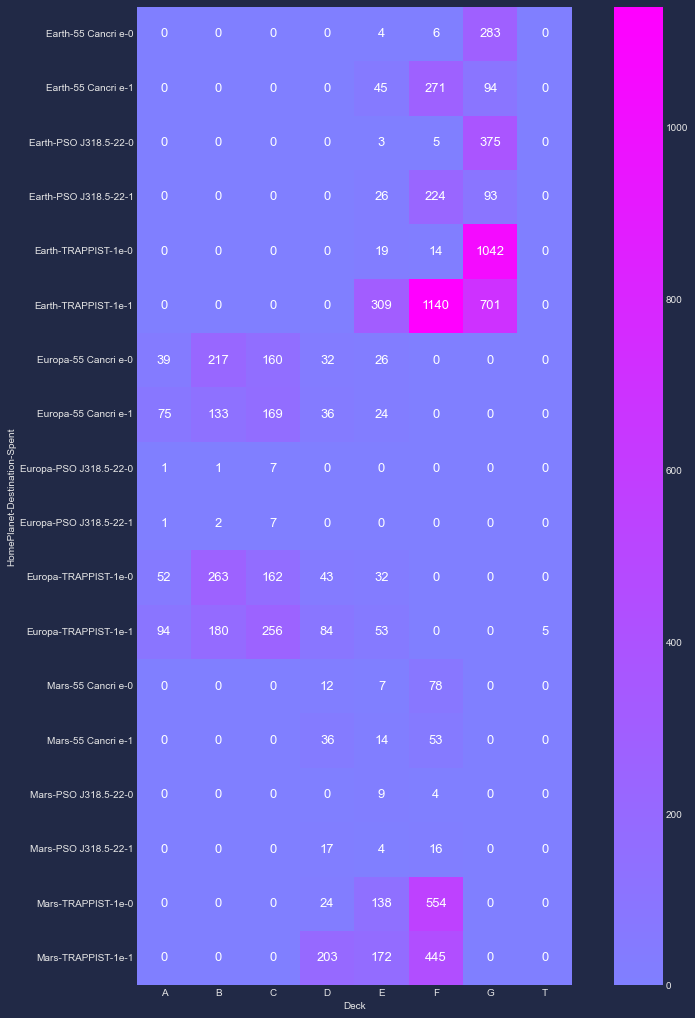

In [66]:
plt.subplots(figsize=(15,18))
sns.heatmap(HP_D_CS_CD, cmap='cool', annot=True, annot_kws={"fontsize":13}, fmt='g', center=0, square=True);

- Out of all the comparisons, HomePlanet-Destination-Spent vs CabinDeck yielded the best patterns.
- Cabins E, F, and G are mostly reserved by passengers that embarked from Earth.
- Cabins A, B, C, D, and E resereved by those that embarked from Europa.
- Cabins D, E, and F resereved by those that embarked from Mars.

#### Imputing Surname and Family Size
- Passengers of the same group are likely to be families (having the same surnames)
- The purpose of filling up LastName is to update the missing data in FamilySize later on.

In [67]:
PG_SN = train_df.groupby(['Group', 'LastName'])['LastName'].size().fillna(0)
PG_SN.head(20)

Group  LastName   
1      Ofracculy      1
2      Vines          1
3      Susent         2
4      Santantines    1
5      Hinetthews     1
6      Jacostaffey    2
7      Beston         1
8      Flatic         3
9      Barne          1
10     Baketton       1
11     Bertsontry     1
12     Pooles         1
14     Eccle          1
15     Hughriend      1
16     Upead          1
17     Brighttt       2
20     Brantuarez     3
       Jacostanley    1
       Mcfaddennon    2
24     Fullided       1
Name: LastName, dtype: int64

In [68]:
impute_cat('Group', 'LastName')

Before LastName Train: 200
Before LastName Test: 94


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After LastName Train: 104
After LastName Test: 51




-  Impute LastName based on 2nd most highly associated feature HomePlanet

In [69]:
impute_cat('HomePlanet', 'LastName')

Before LastName Train: 104
Before LastName Test: 51
After LastName Train: 0
After LastName Test: 0




C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


In [70]:
# Update the 'FamilySize' column and apply sqrt transform
for dataset in df:
    dataset['FamilySize'] = dataset['LastName'].map(lambda x: dataset['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)
    dataset['FamilySize'] = dataset['FamilySize']**(1./2)
    dataset['GroupSize'] = np.log(dataset['GroupSize'])

- Impute remaining missing Deck and Side based on LastName, followed by HomePlanet.

In [71]:
impute_cat('LastName', 'Deck')
impute_cat('HomePlanet', 'Deck')

impute_cat('LastName', 'Side')
impute_cat('HomePlanet', 'Side')

Before Deck Train: 99
Before Deck Test: 63


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After Deck Train: 4
After Deck Test: 0


Before Deck Train: 4
Before Deck Test: 0
After Deck Train: 0
After Deck Test: 0


Before Side Train: 99
Before Side Test: 63


C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])
C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


After Side Train: 4
After Side Test: 0


Before Side Train: 4
Before Side Test: 0
After Side Train: 0
After Side Test: 0




C:\Users\chand\AppData\Local\Temp\ipykernel_10724\3170953530.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_full = pd.concat([train_df, test_df])


- We want finalize if our missing data have all been filled before we proceed to preprocessing.

- I will be dropping variables that are highly cardinal, weakly correlated/associated with the target variable, and multicollinearity-inducing.

In [72]:
train_df.dtypes

# Change VIP data type from bool to object
for dataset in df:
    dataset['VIP'] = dataset['VIP'].astype(object)

In [73]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Premium,Basic,All_Services,AgeGroup,AgeGroupNum,Spent,Group,GroupSize,withGroup,Deck,Num,Side,FirstName,LastName,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,3.688879,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,0.000000,0.000000,0.000000,"(31.6, 47.4]",2.0,0,1,0.000000,0,B,0,P,Maham,Ofracculy,1.00000
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,3.218876,False,4.700480,2.302585,3.258097,6.309918,3.806662,Juanna Vines,True,6.555357,3.555348,6.602588,"(15.8, 31.6]",1.0,1,2,0.000000,0,F,0,S,Juanna,Vines,2.00000
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,4.077537,True,3.784190,8.182280,0.000000,8.812248,3.912023,Altark Susent,False,8.825854,8.182280,9.248021,"(47.4, 63.2]",3.0,1,3,0.693147,1,A,0,S,Altark,Susent,2.44949
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,3.526361,False,0.000000,7.157735,5.918894,8.110728,5.267858,Solam Susent,False,8.167068,7.411556,8.551981,"(31.6, 47.4]",2.0,1,3,0.693147,1,A,0,S,Solam,Susent,2.44949
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,2.833213,False,5.717028,4.262680,5.023881,6.338594,1.098612,Willy Santantines,True,6.769642,5.402677,6.995766,"(15.8, 31.6]",1.0,1,4,0.000000,0,F,1,S,Willy,Santantines,2.44949


In [74]:
train_df1= train_df.copy()

In [75]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [76]:
new_df = MultiColumnLabelEncoder(columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported',
'Deck', 'Side', 'LastName', 'Num']).fit_transform(train_df1)

In [77]:
new_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Premium,Basic,All_Services,AgeGroup,AgeGroupNum,Spent,Group,GroupSize,withGroup,Deck,Num,Side,FirstName,LastName,FamilySize
0,0001_01,1,0,B/0/P,2,3.688879,0,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,0,0.000000,0.000000,0.000000,"(31.6, 47.4]",2.0,0,1,0.000000,0,1,0,0,Maham,1432,1.00000
1,0002_01,0,0,F/0/S,2,3.218876,0,4.700480,2.302585,3.258097,6.309918,3.806662,Juanna Vines,1,6.555357,3.555348,6.602588,"(15.8, 31.6]",1.0,1,2,0.000000,0,5,0,1,Juanna,2110,2.00000
2,0003_01,1,0,A/0/S,2,4.077537,1,3.784190,8.182280,0.000000,8.812248,3.912023,Altark Susent,0,8.825854,8.182280,9.248021,"(47.4, 63.2]",3.0,1,3,0.693147,1,0,0,1,Altark,1991,2.44949
3,0003_02,1,0,A/0/S,2,3.526361,0,0.000000,7.157735,5.918894,8.110728,5.267858,Solam Susent,0,8.167068,7.411556,8.551981,"(31.6, 47.4]",2.0,1,3,0.693147,1,0,0,1,Solam,1991,2.44949
4,0004_01,0,0,F/1/S,2,2.833213,0,5.717028,4.262680,5.023881,6.338594,1.098612,Willy Santantines,1,6.769642,5.402677,6.995766,"(15.8, 31.6]",1.0,1,4,0.000000,0,5,1,1,Willy,1779,2.44949


In [78]:
new_df.drop(columns=['PassengerId', 'Cabin', 'Name', 'AgeGroup', 'FirstName'], axis=1, inplace=True)

In [79]:
# Defining X and Y variables

X = new_df.drop(['Transported'],axis=1)
y = new_df['Transported']

In [80]:
# dataframe with numerical column only

num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
#print('Series before feature selection: \n\n{}\n'.format(vif_series1))
vif_series1.sort_values(ascending=False)

c:\Users\chand\anaconda3\envs\mywork\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


const           84.551857
All_Services    73.687528
Spent           48.992437
Premium         17.340933
Basic           14.763710
FoodCourt        6.782986
CryoSleep        5.562123
GroupSize        4.905858
withGroup        4.786255
ShoppingMall     4.601557
Age              3.266417
RoomService      3.057969
VRDeck           2.909267
Spa              2.796676
AgeGroupNum      2.554668
Deck             1.803999
HomePlanet       1.625691
FamilySize       1.126535
Destination      1.078761
Num              1.059197
Group            1.057040
VIP              1.054142
LastName         1.009560
Side             1.003964
dtype: float64

- From the above we can obseve that features such as  All servics, spent, premium and basic having VIF greater than 10, lets drop those features.

In [81]:
# we drop the one with the highest vif values

num_feature_set1 = num_feature_set.drop(['All_Services', 'Spent', 'Premium', 'Basic'], axis=1)
vif_series2 = pd.Series([variance_inflation_factor(num_feature_set1.values,i) for i in range(num_feature_set1.shape[1])],index=num_feature_set1.columns)
# print('Series before feature selection: \n\n{}\n'.format(vif_series1))
vif_series2.sort_values(ascending=False)

const           82.879477
GroupSize        4.875232
withGroup        4.783659
Age              2.939861
CryoSleep        2.918756
AgeGroupNum      2.522892
Deck             1.753518
FoodCourt        1.686044
RoomService      1.571321
VRDeck           1.556873
HomePlanet       1.507775
Spa              1.503734
ShoppingMall     1.435203
FamilySize       1.125764
Destination      1.076425
Num              1.058392
Group            1.056919
VIP              1.051544
LastName         1.009480
Side             1.003491
dtype: float64

In [82]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Premium,Basic,All_Services,AgeGroup,AgeGroupNum,Spent,Group,GroupSize,withGroup,Deck,Num,Side,FirstName,LastName,FamilySize,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,3.332205,False,0.000000,0.000000,0.000000,0.000000,0.00000,Nelly Carsoning,0.000000,0.000000,0.000000,"(15.8, 31.6]",1.0,0,13,0.0,0,G,3,S,Nelly,Carsoning,2.000000,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,2.995732,False,0.000000,2.302585,0.000000,7.945910,0.00000,Lerome Peckers,7.945910,2.302585,7.949091,"(15.8, 31.6]",1.0,1,18,0.0,0,F,4,S,Lerome,Peckers,1.000000,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,3.465736,False,0.000000,0.000000,0.000000,0.000000,0.00000,Sabih Unhearfus,0.000000,0.000000,0.000000,"(15.8, 31.6]",1.0,0,19,0.0,0,C,0,S,Sabih,Unhearfus,1.000000,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,3.663562,False,0.000000,8.802823,0.000000,5.204007,6.37332,Meratz Caltilter,6.642487,8.802823,8.911800,"(31.6, 47.4]",2.0,1,21,0.0,0,C,1,S,Meratz,Caltilter,1.000000,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,3.044522,False,2.397895,0.000000,6.455199,0.000000,0.00000,Brence Harperez,2.397895,6.455199,6.470800,"(15.8, 31.6]",1.0,1,23,0.0,0,F,5,S,Brence,Harperez,1.732051,NaN


In [83]:
# drop those features
train_df2 =  train_df.drop(columns=['PassengerId', 'Cabin', 'Name', 'AgeGroup', 'FirstName',
'LastName', 'Num', 'AgeGroupNum'], axis=1)
test_df2 =  test_df.drop(columns=['PassengerId', 'Cabin', 'Name', 'AgeGroup', 'FirstName',
'LastName', 'Num', 'AgeGroupNum'], axis=1)

In [84]:
# assign 0 and 1 for target features.
train_df2['Transported'] = train_df2['Transported'].apply(lambda x: 1 if x == True else 0)

In [85]:
# create dummy features for categorical and assign features for X and y.
X = train_df2.drop(['Transported'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = train_df2['Transported']

#### Data Preprocessing

In [86]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(6954, 28) (1739, 28)


In [87]:
##  Function to calculate different metric scores of the model - Accuracy, Recall,  Precision, f1 macro.

def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
        print("f1 on training set : ", metrics.f1_score(y_train, pred_train))
        print("f1 on test set : ", metrics.f1_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [88]:
## Function to create confusion matrix

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [89]:
# create base model to see which model will perform better.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "GNB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gnb", GaussianNB()),
            ]
        ),
    )
)


models.append(
    (
        "SGD",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("sgd", SGDClassifier(random_state=42,  class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "SVM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("svm", svm.SVC(random_state=42,  class_weight='balanced', probability=True)),
            ]
        ),
    )
)

models.append(
    (
        "Ridge",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("ridge", RidgeClassifier(random_state=42, max_iter=1000, class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "LGBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("lgbm", LGBMClassifier(random_state=42,  class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "XTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xtree", ExtraTreesClassifier(random_state=42,  class_weight='balanced', bootstrap=True)),
            ]
        ),
    )
)

models.append(
    (
        "CATB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("catb", CatBoostClassifier(random_state=42,  verbose=False)),
            ]
        ),
    )
)

models.append(
    (
        "KNN",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("knn", KNeighborsClassifier()),
            ]
        ),
    )
)

models.append(
    (
        "LG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("lg", LogisticRegression(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)


models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bg", BaggingClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "accuracy"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=42
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

GNB: 72.01660210293305
SGD: 78.2860319939591
SVM: 79.95395890333023
Ridge: 78.73171311979891
LGBM: 80.73058562495797
XTREE: 80.0689840650844
CATB: 81.09002891145029
KNN: 75.74054171472311
LG: 79.3644859813084
DTREE: 74.67644518461435
Bagging: 78.77481652348861
RF: 79.50810192967121
ADB: 79.36452735726589
GBM: 80.38536532384445
XGB: 80.1266621497913


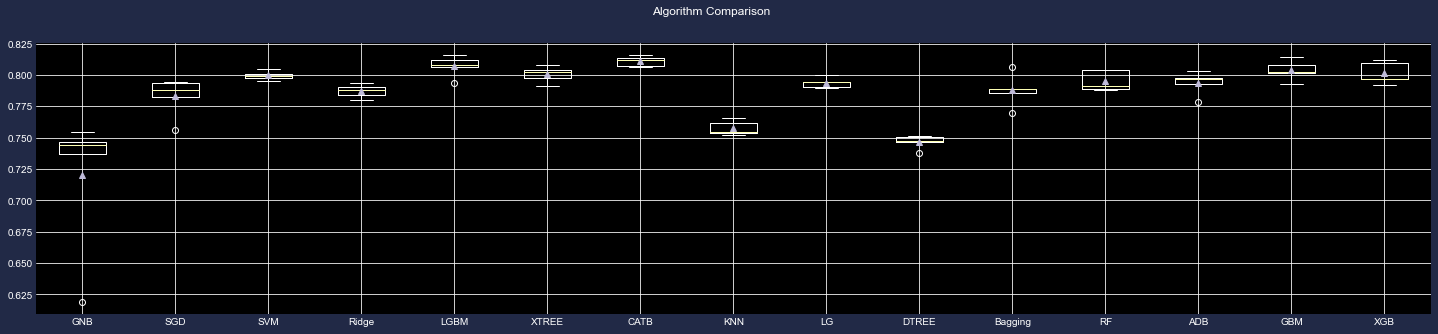

In [90]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(25, 5))

plt.style.use("dark_background")

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot((results), showmeans=True)
ax.set_xticklabels(names)
plt.show()

- From the above model comparision we can observe that SVM, LGBM, XTree, CatBoost, Random Forest, GBM and XGBoost produced good model score.
- Lets build two best models (LGBM and CatBoost)

### Model building using OPTUNA.

In [91]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
scorer = metrics.make_scorer(metrics.accuracy_score)

#### LGBM Model using OPTUNA

In [92]:
def lgbm_objective(trial: Trial, X, y) -> float:
    
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        "n_estimators" : trial.suggest_int('n_estimators', 0, 500),
        'max_depth':trial.suggest_int('max_depth', 2, 25),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        #'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 500),
        #'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),


        #'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        #'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        
        #'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        #'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        #'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        
        }
    
    model = LGBMClassifier(random_state = 42, n_jobs=-1, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=10).mean()
#  scoring="neg_root_mean_squared_error" for regression problem

In [93]:
lgbm_study = optuna.create_study(direction='maximize', sampler=TPESampler())
lgbm_study.optimize(lambda trial : lgbm_objective(trial, X, y), n_trials = 50)

[I 2022-06-22 14:03:10,639] A new study created in memory with name: no-name-f38d3d14-0f09-43f4-bc60-aa64d3e5796c
[I 2022-06-22 14:03:11,227] Trial 0 finished with value: 0.7533649458354826 and parameters: {'n_estimators': 57, 'max_depth': 25, 'num_leaves': 24}. Best is trial 0 with value: 0.7533649458354826.
[I 2022-06-22 14:03:13,553] Trial 1 finished with value: 0.7256336388767642 and parameters: {'n_estimators': 176, 'max_depth': 17, 'num_leaves': 55}. Best is trial 0 with value: 0.7533649458354826.
[I 2022-06-22 14:03:14,194] Trial 2 finished with value: 0.773154901260532 and parameters: {'n_estimators': 34, 'max_depth': 24, 'num_leaves': 27}. Best is trial 2 with value: 0.773154901260532.
[I 2022-06-22 14:03:20,459] Trial 3 finished with value: 0.7300091266219594 and parameters: {'n_estimators': 299, 'max_depth': 14, 'num_leaves': 101}. Best is trial 2 with value: 0.773154901260532.
[I 2022-06-22 14:03:23,798] Trial 4 finished with value: 0.7417435816039046 and parameters: {'n_es

In [94]:
print('Best trial: score {},\nparams {}'.format(lgbm_study.best_trial.value, lgbm_study.best_trial.params))

Best trial: score 0.7937461476396439,
params {'n_estimators': 39, 'max_depth': 7, 'num_leaves': 4}


In [104]:
# Creating new pipeline with best parameters
lgbm_optuna= make_pipeline(
    StandardScaler(),
    LGBMClassifier(random_state=42, n_estimators=39, max_depth=7, num_leaves=4))

# Fit the model on training data
lgbm_optuna.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier',
                 LGBMClassifier(max_depth=7, n_estimators=39, num_leaves=4,
                                random_state=42))])

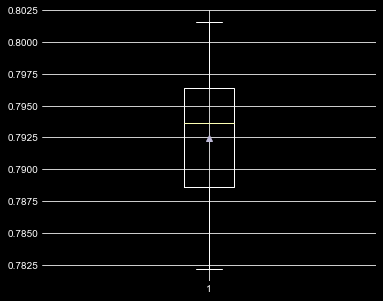

In [105]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='accuracy'
plt.style.use("dark_background")

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lgbm_optuna, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr, showmeans=True)
plt.show()

- Performance on training data varies between 0.7825 to 0.8025.

Accuracy on training set :  0.7956571757262008
Accuracy on test set :  0.7998849913743531
Recall on training set :  0.8615077098800685
Recall on test set :  0.8584474885844748
Precision on training set :  0.7632178092587908
Precision on test set :  0.7704918032786885
f1 on training set :  0.8093896713615024
f1 on test set :  0.8120950323974082


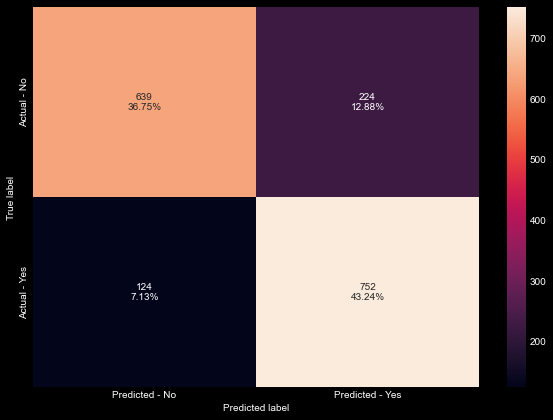

In [106]:
# Calculating different metrics
lgbm_optuna_score=get_metrics_score(lgbm_optuna)

# Creating confusion matrix
make_confusion_matrix(lgbm_optuna, y_test)

- Accuracy on test data is 79.9%.

#### CatBoost Model using OPTUNA

In [98]:
def ctb_objective(trial: Trial, X, y) -> float:
    
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        "n_estimators" : trial.suggest_int('n_estimators', 0, 1000),
        'depth':trial.suggest_int('depth', 2, 14)
        }

    model = CatBoostClassifier(random_state=42, verbose=False, **param)
    
    return cross_val_score(model, X, y, scoring=scorer, cv=10).mean()
#  scoring="neg_root_mean_squared_error" for regression problem

In [99]:
ctb_study = optuna.create_study(direction='maximize', sampler=TPESampler())
ctb_study.optimize(lambda trial : ctb_objective(trial, X, y), n_trials = 50)

[I 2022-06-22 14:04:46,294] A new study created in memory with name: no-name-ee016808-7db5-4b6b-a744-1f66df5aa939
[I 2022-06-22 14:04:47,402] Trial 0 finished with value: 0.7423235850429216 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.025317968388505925, 'boosting_type': 'Plain', 'subsample': 0.4, 'learning_rate': 0.014, 'n_estimators': 52, 'depth': 12}. Best is trial 0 with value: 0.7423235850429216.
[I 2022-06-22 14:05:11,413] Trial 1 finished with value: 0.796851579963758 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08872259897433317, 'boosting_type': 'Ordered', 'subsample': 1.0, 'learning_rate': 0.012, 'n_estimators': 273, 'depth': 8}. Best is trial 1 with value: 0.796851579963758.
[I 2022-06-22 14:05:15,060] Trial 2 finished with value: 0.742668544899012 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.015785304303643888, 'boosting_type': 'Ordered', 'subsample': 0.6, 'learning_rate': 0.01, 'n_estimators': 147, 'de

In [100]:
print('Best trial: score {},\nparams {}'.format(ctb_study.best_trial.value, ctb_study.best_trial.params))

Best trial: score 0.8039847625094243,
params {'objective': 'Logloss', 'colsample_bylevel': 0.09860233524486889, 'boosting_type': 'Plain', 'subsample': 0.4, 'learning_rate': 0.016, 'n_estimators': 295, 'depth': 11}


In [107]:
# Creating new pipeline with best parameters
ctb_optuna= make_pipeline(
    StandardScaler(),
    CatBoostClassifier(random_state=42, verbose=False, objective = 'Logloss', colsample_bylevel = 0.09860, boosting_type = 'Plain', subsample = 0.4, 
    learning_rate = 0.016, n_estimators = 295, depth = 11))

# Fit the model on training data
ctb_optuna.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x0000021E20035F40>)])

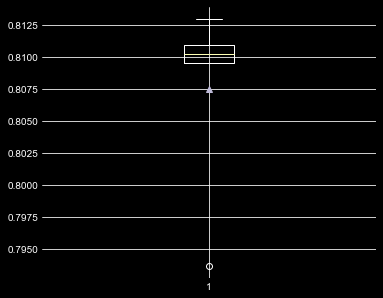

In [108]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='accuracy'
plt.style.use("dark_background")

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=ctb_optuna, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr, showmeans=True)
plt.show()

- Performance on training data varies between 0.7950 to 0.8125.

Accuracy on training set :  0.8375035950532068
Accuracy on test set :  0.7993099482461185
Recall on training set :  0.8609366076527698
Recall on test set :  0.8184931506849316
Precision on training set :  0.824220885729907
Precision on test set :  0.7905181918412348
f1 on training set :  0.8421787709497207
f1 on test set :  0.8042624789680315


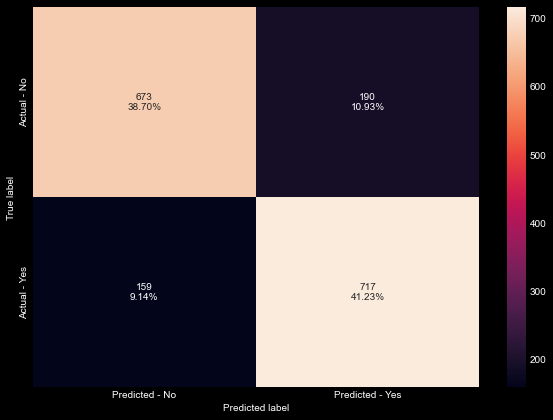

In [109]:
# Calculating different metrics
ctb_optuna_score=get_metrics_score(ctb_optuna)

# Creating confusion matrix
make_confusion_matrix(ctb_optuna, y_test)

- Accuracy on test data is 0.799
- Both LGBM and CatBoost produced same accuracy score on test data.

### AUC ROC Curve.
- The Receiver Operator Characteristic (ROC) curve is an evaluation metric used for classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between positive classes and negative classes.
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
When AUC = 1, then the classifier can perfectly distinguish between all the Positive and the Negative class correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.


In [110]:
# predict probabilities on the best 2 models.
lgbm_optuna_pred_prob = lgbm_optuna.predict_proba(X_test)
catb_optuna_prob = ctb_optuna.predict_proba(X_test)

In [111]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lgbm_optuna_pred_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, catb_optuna_prob[:,1], pos_label=1)

In [112]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [113]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_lgbm_optuna_pred_prob = roc_auc_score(y_test, lgbm_optuna_pred_prob[:,1])
auc_score_catb_optuna_prob = roc_auc_score(y_test, catb_optuna_prob[:,1])

In [114]:
# print AUC ROC score for top models.

print('LGBM Optuna AUC ROC score is {a:.3f}'.format(a=auc_score_lgbm_optuna_pred_prob))
print('CatBoost Optuna AUC ROC score is {b:.3f}'.format(b=auc_score_catb_optuna_prob))

LGBM Optuna AUC ROC score is 0.885
CatBoost Optuna AUC ROC score is 0.900


- CatBoost model able to distinguish slightlyl better by 0.5 comparing to LGBM. 

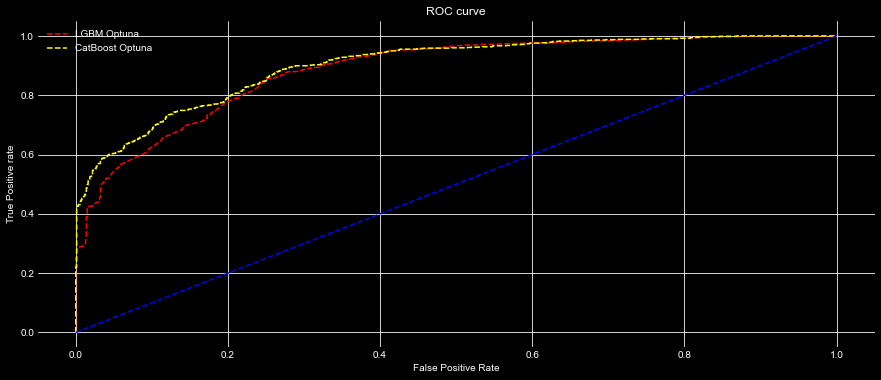

In [121]:
# Plot the AUC ROC curve for the models.

plt.figure(figsize=(15,6))
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='LGBM Optuna')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='CatBoost Optuna')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Feature importance of the best model.

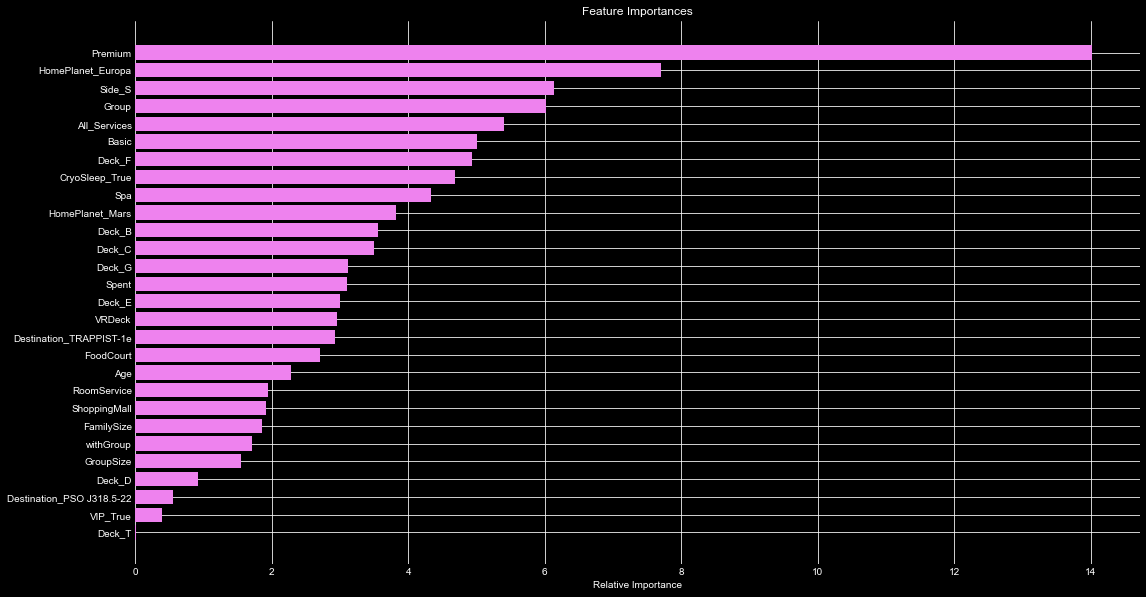

In [120]:
feature_names = X_train.columns
importances = ctb_optuna[1].feature_importances_
#importances= np.mean([tree.feature_importances_ for tree in adb_gridsearch[1].estimators_], axis=0)

indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- From the above CatBoost model we can observe that Premium, Home planet Europa, Side S and so on are the important features to predict whether travellers transported or not.
- Features such as Deck T VIP and so on are the least important features to predict whether travellers transported or not.